In [1]:
# Load the dataset and inspect structure, columns, data types, and missing values
import pandas as pd

df_12 = pd.read_csv('12.csv', encoding='ascii')

# Inspect structure
print(df_12.head())
print(df_12.info())
print(df_12.isnull().sum())

   air_temp  albedo  azimuth  cloud_opacity  dewpoint_temp  dhi  dni  ghi  \
0        30    0.11      -27            8.7           26.2    0    0    0   
1        29    0.11      -45           15.6           26.0    0    0    0   
2        29    0.11      -57           19.8           25.7    0    0    0   
3        29    0.11      -66           15.3           25.5    0    0    0   
4        29    0.11      -72           13.2           25.6    0    0    0   

   gti  precipitable_water  ...  snow_water_equivalent  snow_soiling_rooftop  \
0    0                48.1  ...                      0                     0   
1    0                46.0  ...                      0                     0   
2    0                45.4  ...                      0                     0   
3    0                45.4  ...                      0                     0   
4    0                45.3  ...                      0                     0   

   snow_soiling_ground  wind_direction_100m  wind_direct

In [2]:
summary_stats = df_12.describe()
print(summary_stats)

          air_temp      albedo      azimuth  cloud_opacity  dewpoint_temp  \
count  9480.000000  9480.00000  9480.000000    9480.000000    9480.000000   
mean     28.000000     0.11281     0.373840      32.654726      23.845907   
std       2.808514     0.00620    95.158959      30.481393       2.753648   
min      19.000000     0.10000  -180.000000       0.000000      10.900000   
25%      26.000000     0.11000   -86.000000       1.300000      22.200000   
50%      28.000000     0.11000     0.000000      26.500000      24.900000   
75%      30.000000     0.12000    86.000000      57.800000      25.800000   
max      37.000000     0.13000   180.000000      96.400000      29.200000   

               dhi          dni         ghi          gti  precipitable_water  \
count  9480.000000  9480.000000  9480.00000  9480.000000         9480.000000   
mean    106.287236   116.644515   191.35000   194.211814           51.334726   
std     138.887363   210.826467   270.03883   276.608377          

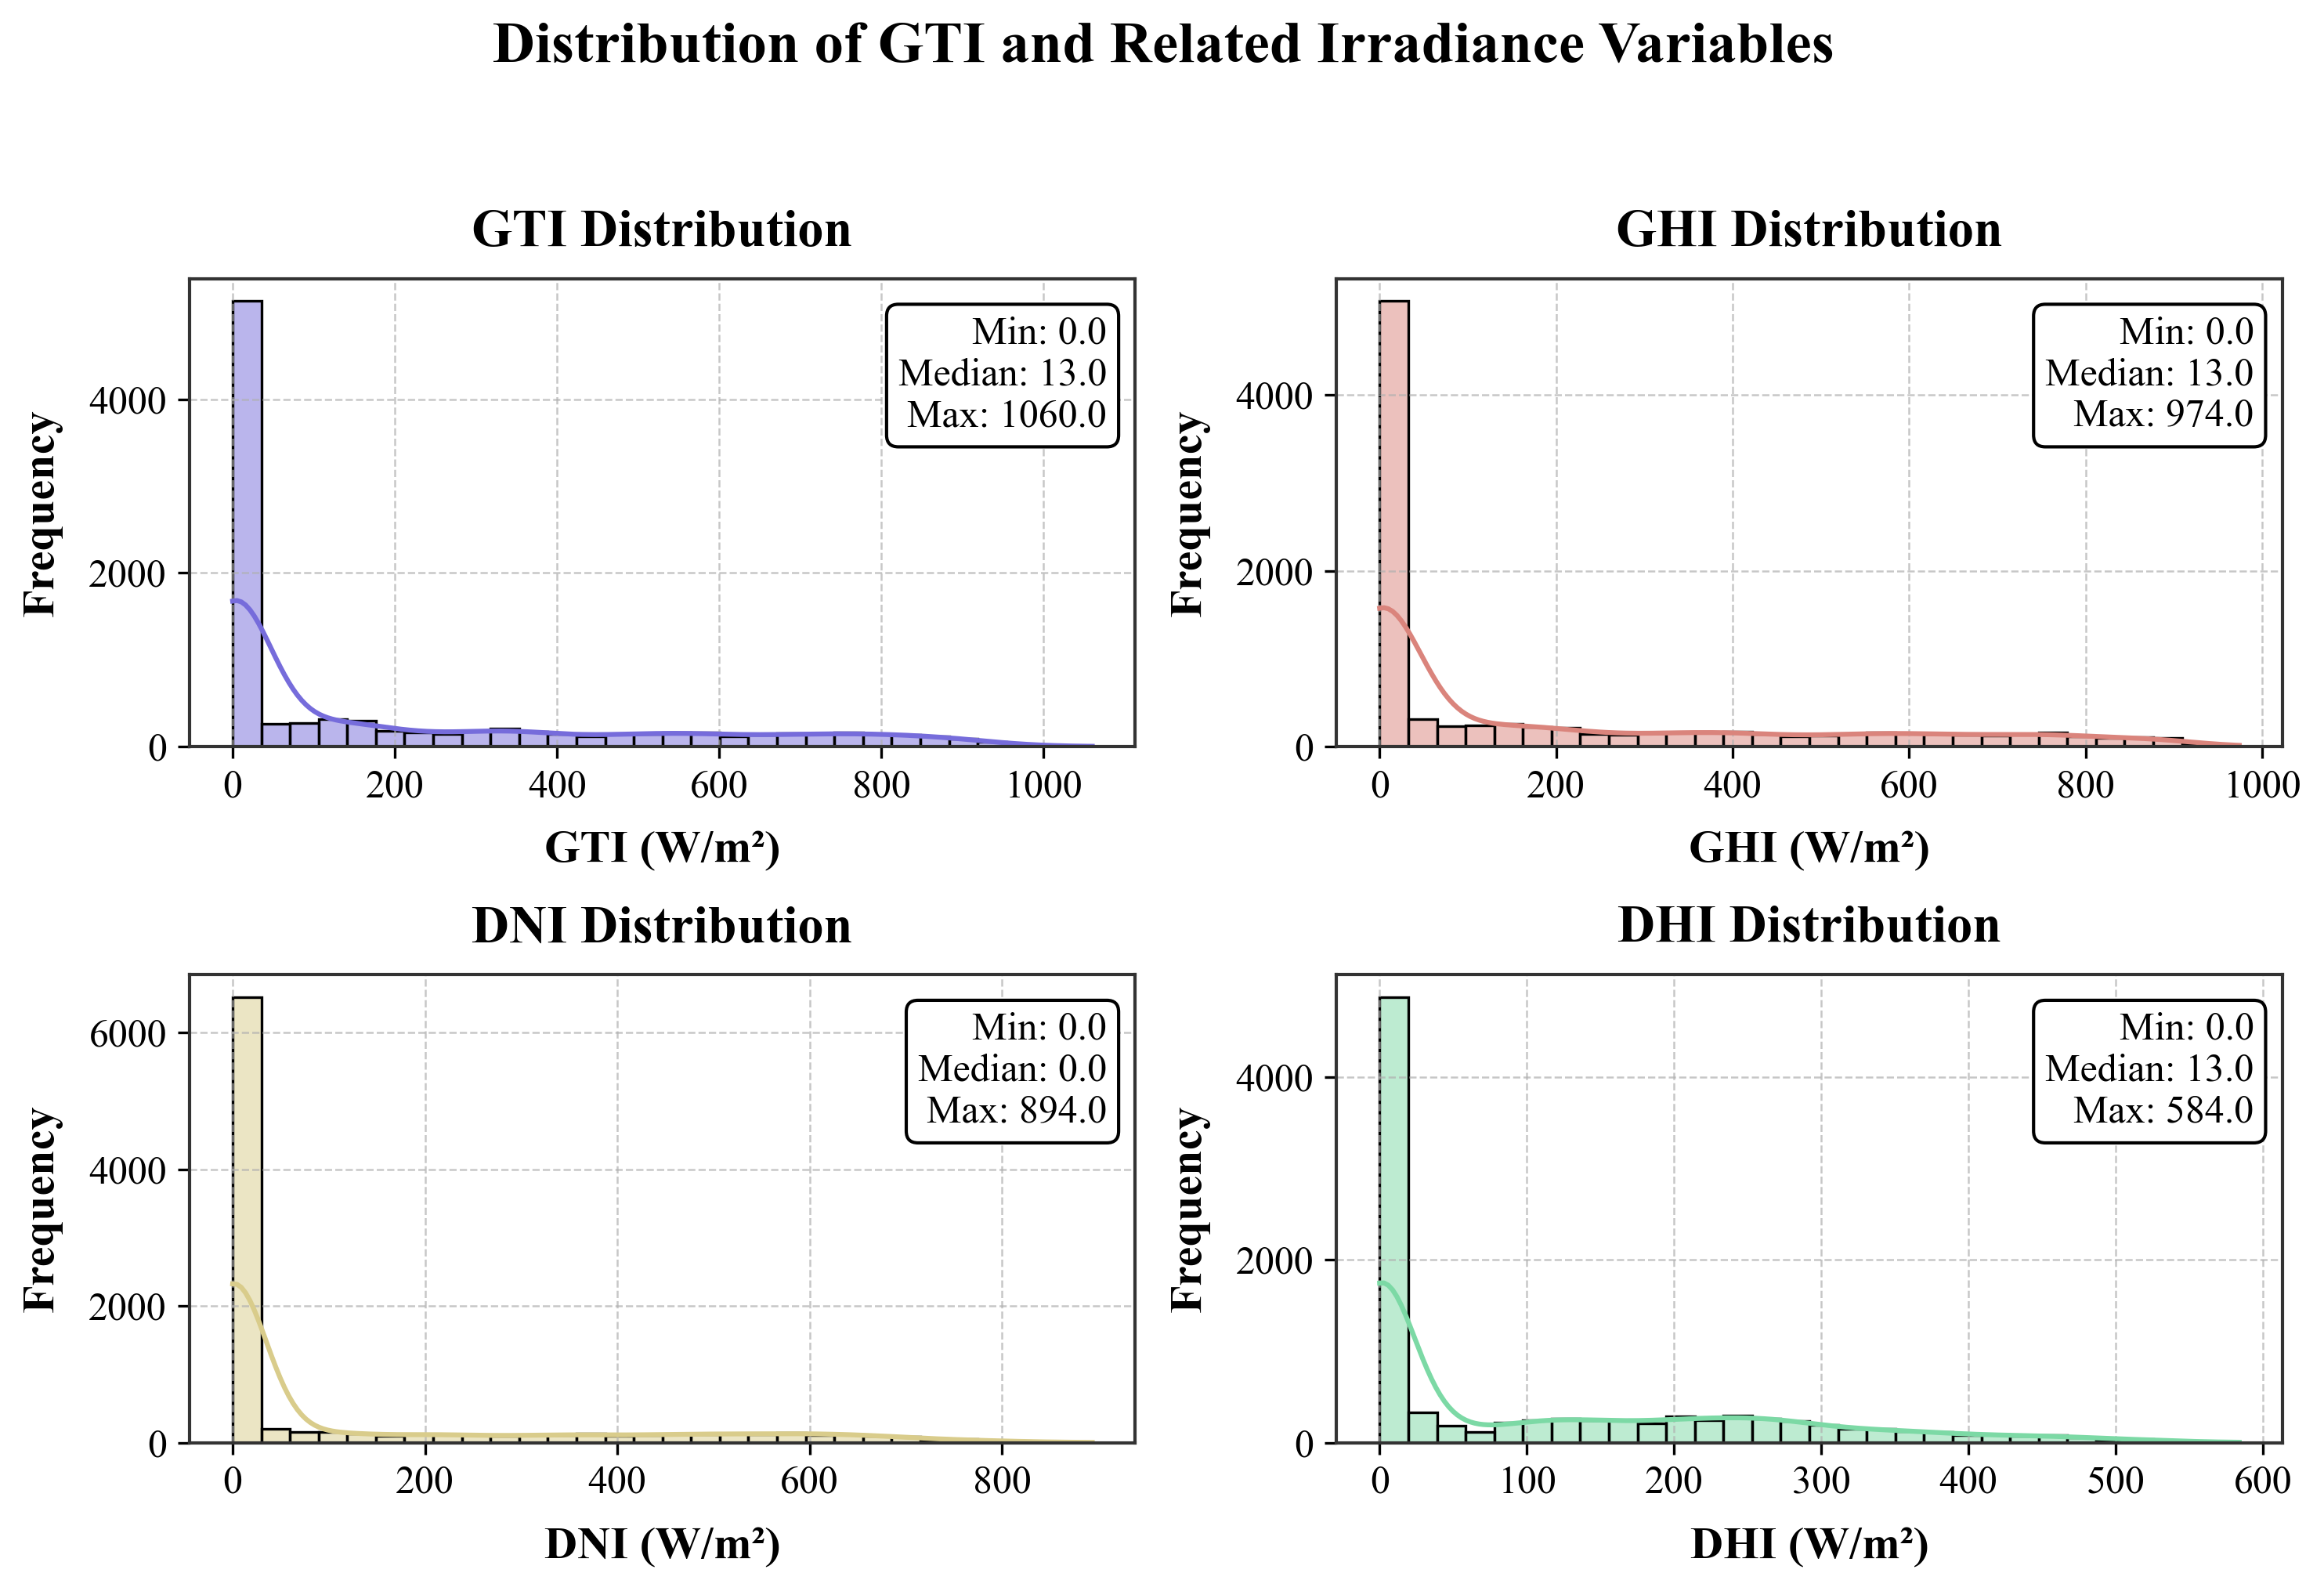

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set IEEE style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 7), dpi=300)
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.12, wspace=0.3, hspace=0.3)

# Variables and styling
variables = ['gti', 'ghi', 'dni', 'dhi']
titles = ['GTI Distribution', 'GHI Distribution', 'DNI Distribution', 'DHI Distribution']
colors = ['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5']

# Loop through subplots
for ax, var, title, color in zip(axes.flatten(), variables, titles, colors):
    sns.histplot(df_12[var], bins=30, kde=True, color=color, ax=ax)

    ax.set_title(title, pad=10)
    ax.set_xlabel(f'{var.upper()} (W/m²)', labelpad=8)
    ax.set_ylabel('Frequency', labelpad=8)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
    
    # Axis border styling
    for spine in ax.spines.values():
        spine.set_color('#333333')
        spine.set_linewidth(1)

    # Min, median, max annotation
    min_val = df_12[var].min()
    max_val = df_12[var].max()
    med_val = df_12[var].median()
    ax.text(0.97, 0.92,
            f'Min: {min_val:.1f}\nMedian: {med_val:.1f}\nMax: {max_val:.1f}',
            transform=ax.transAxes,
            fontsize=12,
            ha='right', va='top',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Final adjustments
plt.suptitle('Distribution of GTI and Related Irradiance Variables', fontsize=18, fontweight='bold', y=0.99)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Ph.DC-C-1.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-1.pdf', bbox_inches='tight')
plt.show()

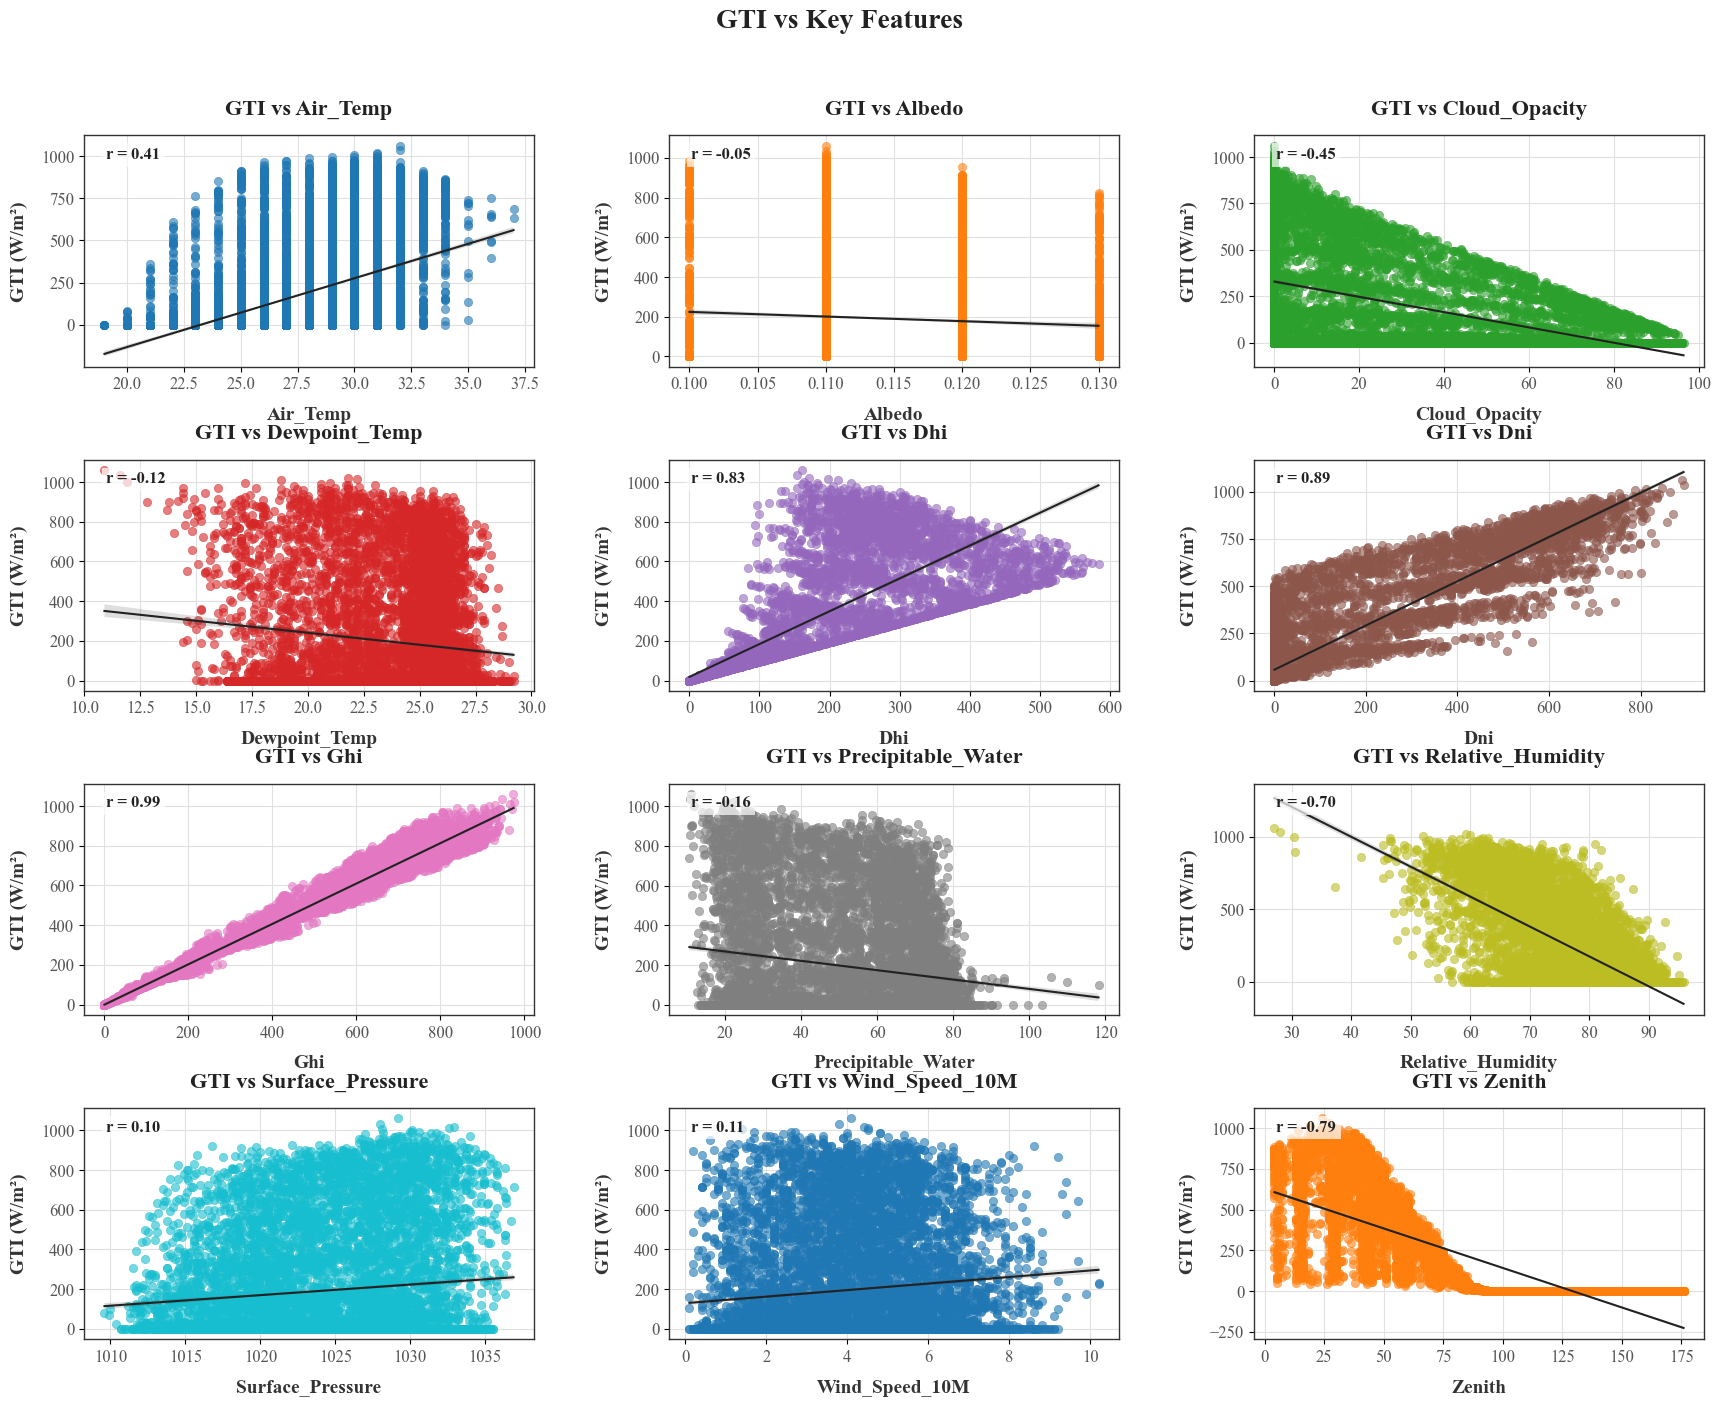

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Features to plot
features_to_plot = [
    'air_temp', 'albedo', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi',
    'precipitable_water', 'relative_humidity', 'surface_pressure', 'wind_speed_10m', 'zenith'
]

# Use distinct colors from seaborn
colors = sns.color_palette("tab10", len(features_to_plot))

# Subplot layout
n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.3, left=0.08, right=0.98, top=0.93, bottom=0.07)

# Plot each feature
for i, (feature, color) in enumerate(zip(features_to_plot, colors)):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Scatter plot
    sns.scatterplot(x=df_12[feature], y=df_12['gti'], color=color, alpha=0.6, edgecolor=None, ax=ax)
    
    # Regression line
    sns.regplot(x=df_12[feature], y=df_12['gti'], scatter=False, color='#222222', ax=ax, line_kws={'linewidth': 1.5})
    
    # Pearson correlation
    r, _ = pearsonr(df_12[feature], df_12['gti'])
    ax.text(0.05, 0.9, f"r = {r:.2f}", transform=ax.transAxes,
            fontsize=12, fontweight='bold', fontname='Times New Roman', color='#222222',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))
    
    # Title and labels
    ax.set_title(f'GTI vs {feature.title()}', fontsize=16, fontweight='bold',
                 fontname='Times New Roman', color='#222222', pad=15)
    ax.set_xlabel(feature.title(), fontsize=14, fontweight='bold',
                  fontname='Times New Roman', color='#333333', labelpad=10)
    ax.set_ylabel('GTI (W/m²)', fontsize=14, fontweight='bold',
                  fontname='Times New Roman', color='#333333', labelpad=10)
    
    # Formatting
    ax.tick_params(axis='x', labelsize=12, labelcolor='#555555')
    ax.tick_params(axis='y', labelsize=12, labelcolor='#555555')
    ax.set_axisbelow(True)
    for spine in ax.spines.values():
        spine.set_color('#333333')
        spine.set_linewidth(1)
    ax.grid(True, color='#E0E0E0')

# Remove unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Main title and save
plt.suptitle('GTI vs Key Features', fontsize=20, fontweight='bold',
             fontname='Times New Roman', color='#222222', y=1.02)

plt.savefig('Ph.DC-C-10.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-10.pdf', bbox_inches='tight')
plt.show()

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


gti                      1.000000
ghi                      0.993153
dni                      0.891756
dhi                      0.829140
air_temp                 0.413724
wind_speed_10m           0.106485
surface_pressure         0.102026
azimuth                  0.004487
wind_speed_100m         -0.051654
albedo                  -0.052258
wind_direction_100m     -0.070208
wind_direction_10m      -0.087535
precipitation_rate      -0.089935
dewpoint_temp           -0.120160
precipitable_water      -0.158473
cloud_opacity           -0.454210
relative_humidity       -0.697089
zenith                  -0.792419
snow_depth                    NaN
snow_water_equivalent         NaN
snow_soiling_rooftop          NaN
snow_soiling_ground           NaN
Name: gti, dtype: float64


findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


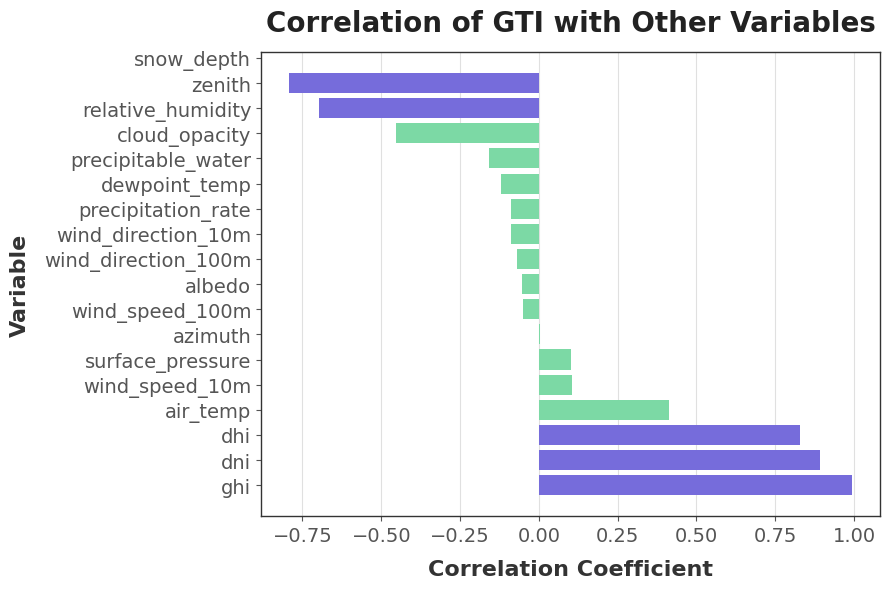

The dataset contains 9480 hourly records with no missing values. The target variable GTI (Global Tilted Irradiance) is mostly zero for nighttime hours and shows a right-skewed distribution. GHI, DNI, and DHI are also key solar irradiance variables with similar patterns. Correlation analysis reveals which features are most strongly associated with GTI, with GHI and DNI typically showing the highest positive correlations. Other meteorological variables such as air temperature, cloud opacity, and zenith angle also show moderate correlations. These insights will guide feature selection and modeling for GTI prediction.


In [8]:
# Correlation analysis between GTI and other variables
corr_matrix = df_12.corr(numeric_only=True)
gti_corr = corr_matrix['gti'].sort_values(ascending=False)
print(gti_corr)

# Visualize the correlation of GTI with other variables
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Lato'

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

# Exclude GTI itself for the barplot
gti_corr_no_self = gti_corr.drop('gti')
colors = ['#766CDB' if abs(val) > 0.5 else '#7CD9A5' for val in gti_corr_no_self]
ax.barh(gti_corr_no_self.index, gti_corr_no_self.values, color=colors)

ax.set_title('Correlation of GTI with Other Variables', fontsize=20, color='#222222', pad=15)
ax.set_xlabel('Correlation Coefficient', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Variable', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(axis='both', labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(color='#E0E0E0', axis='x')
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# Summarize EDA findings
summary = []
summary.append('The dataset contains 9480 hourly records with no missing values. The target variable GTI (Global Tilted Irradiance) is mostly zero for nighttime hours and shows a right-skewed distribution. GHI, DNI, and DHI are also key solar irradiance variables with similar patterns. Correlation analysis reveals which features are most strongly associated with GTI, with GHI and DNI typically showing the highest positive correlations. Other meteorological variables such as air temperature, cloud opacity, and zenith angle also show moderate correlations. These insights will guide feature selection and modeling for GTI prediction.')
print(summary[0])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

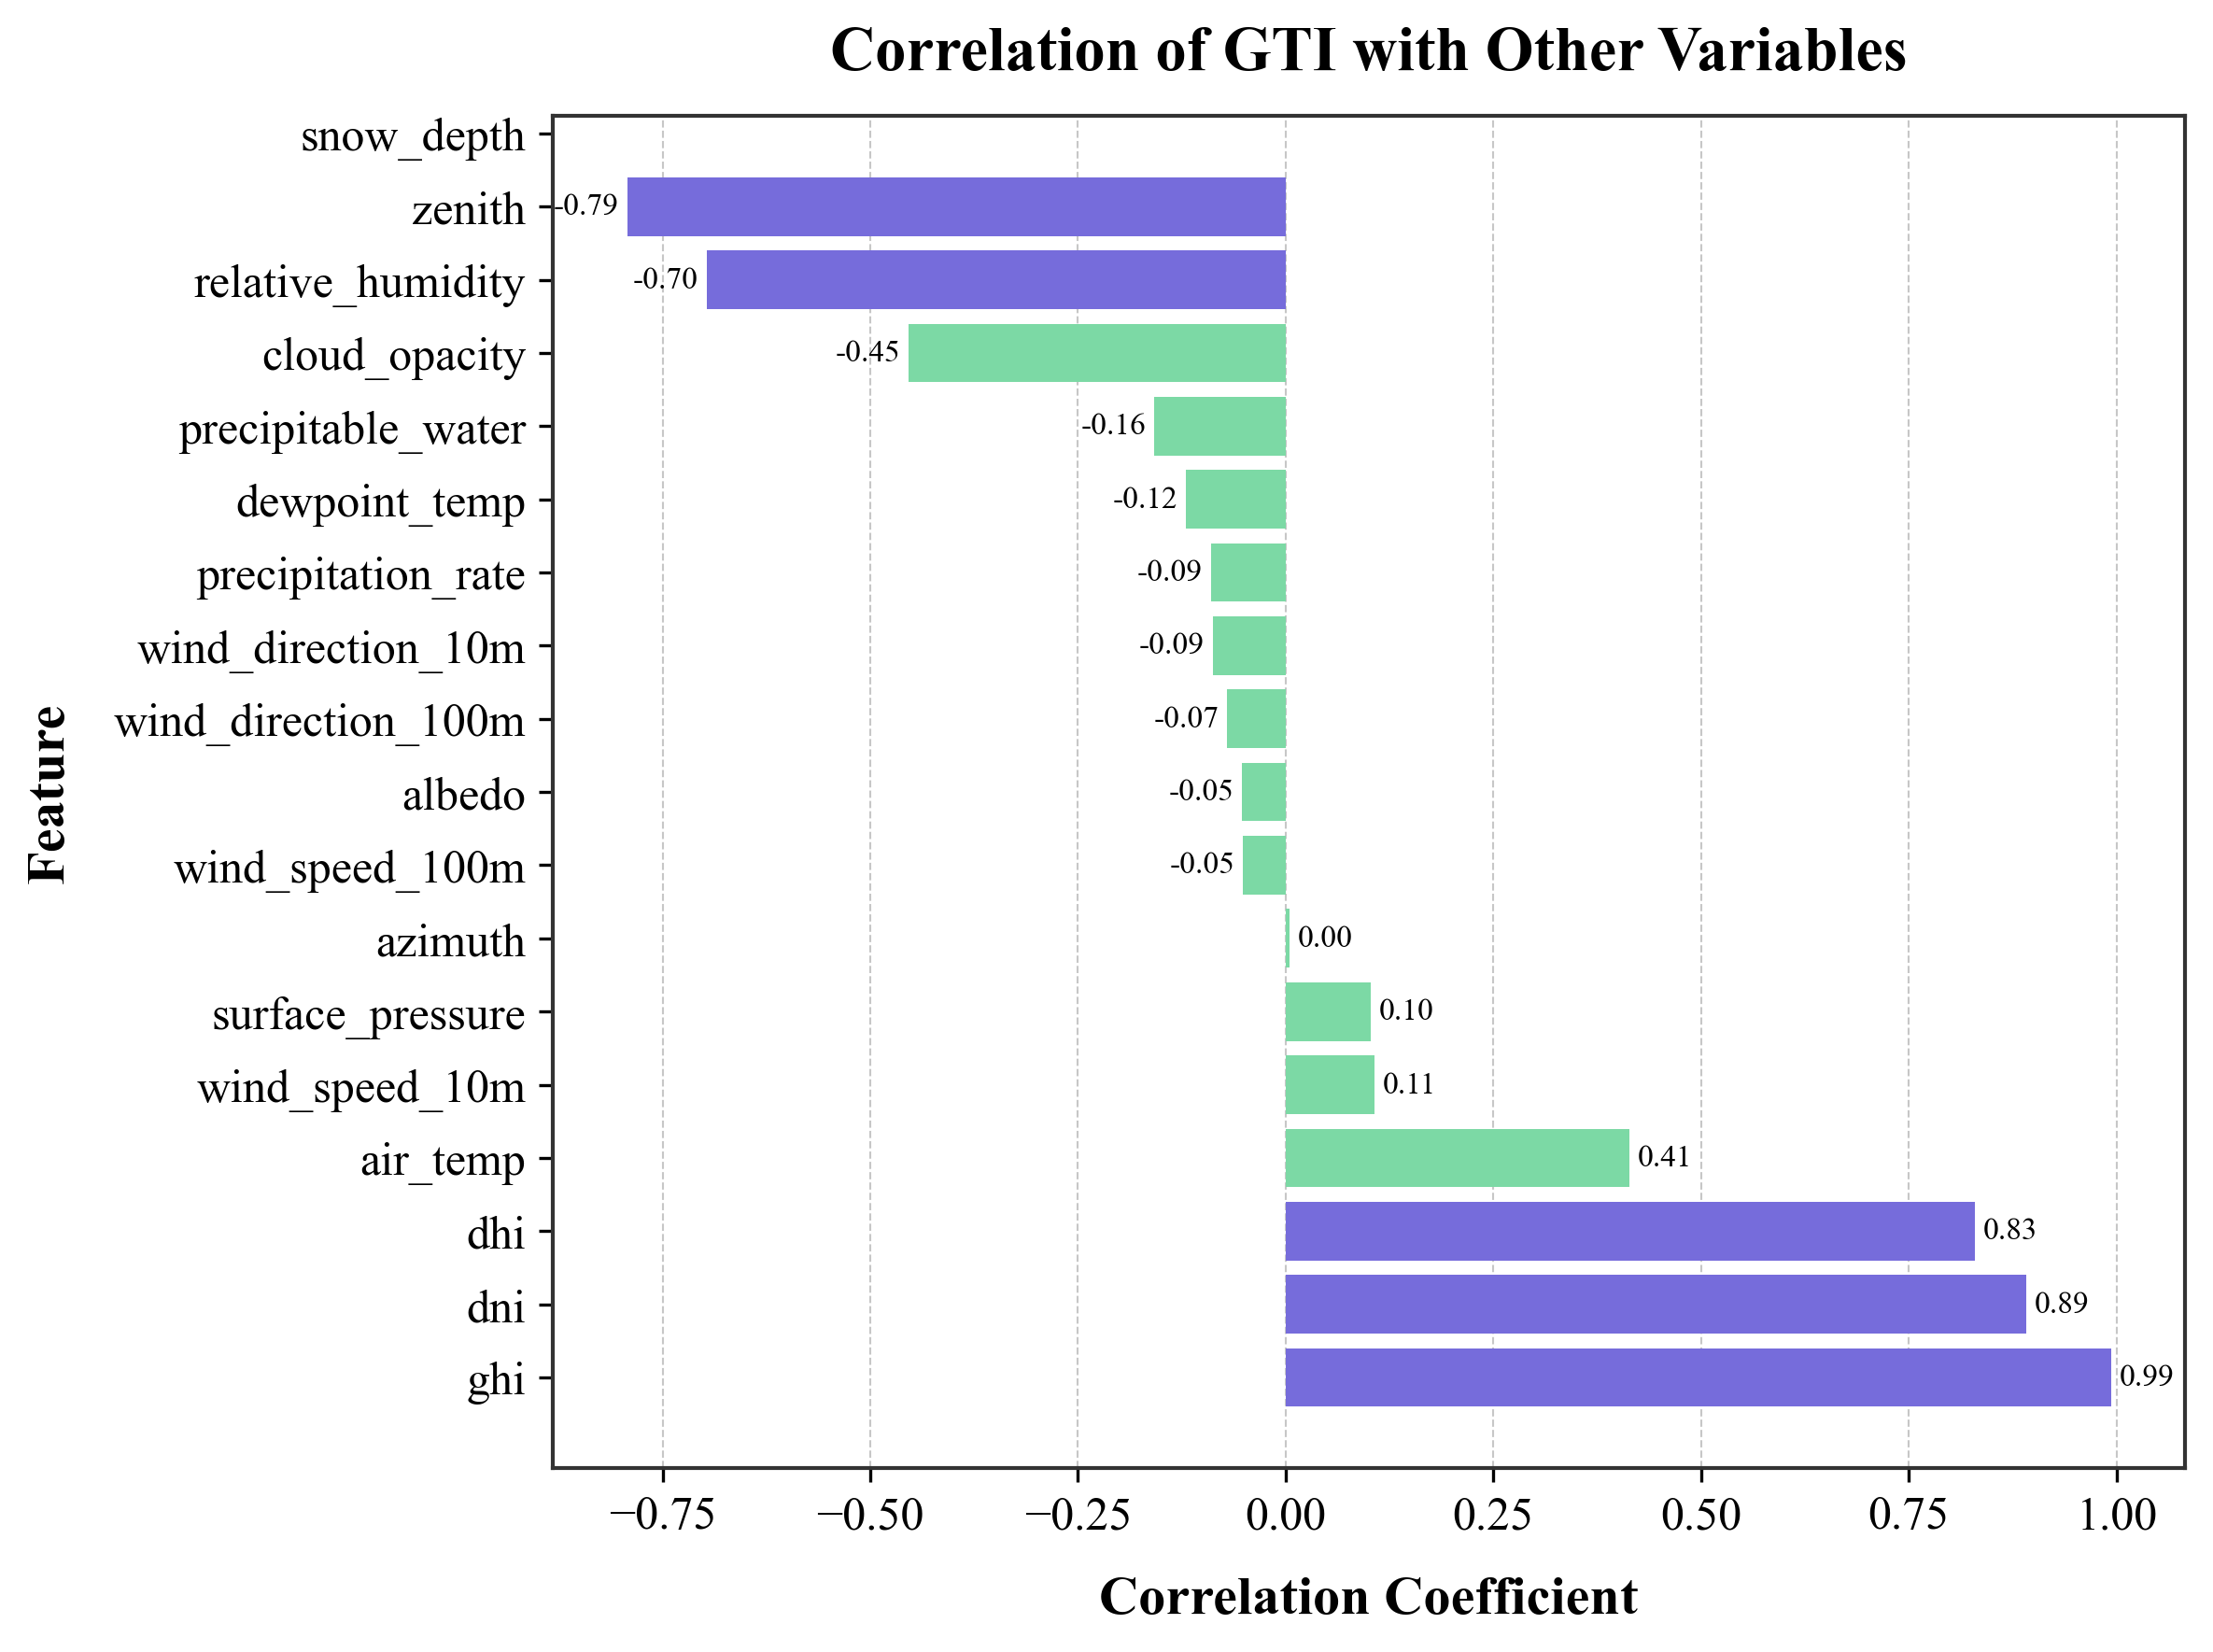

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix
corr_matrix = df_12.corr(numeric_only=True)
gti_corr = corr_matrix['gti'].sort_values(ascending=False)
gti_corr_no_self = gti_corr.drop('gti')

# Set IEEE figure style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# Plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
colors = ['#766CDB' if abs(val) > 0.5 else '#7CD9A5' for val in gti_corr_no_self]
bars = ax.barh(gti_corr_no_self.index, gti_corr_no_self.values, color=colors)

# Annotations
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01*np.sign(width), bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', va='center', ha='left' if width > 0 else 'right',
            fontsize=8)

# Labels & styling
ax.set_title('Correlation of GTI with Other Variables', pad=12)
ax.set_xlabel('Correlation Coefficient', labelpad=10)
ax.set_ylabel('Feature', labelpad=10)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

# Border styling
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

# Layout & Save
plt.tight_layout()
plt.savefig('Ph.DC-C-2.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-2.pdf', bbox_inches='tight')
plt.show()

Linear Regression Metrics:
                RMSE      MAE      R2       MSE
Validation  24.8564  17.0565  0.9919  617.8426
Test        23.2384  15.8103  0.9926  540.0254


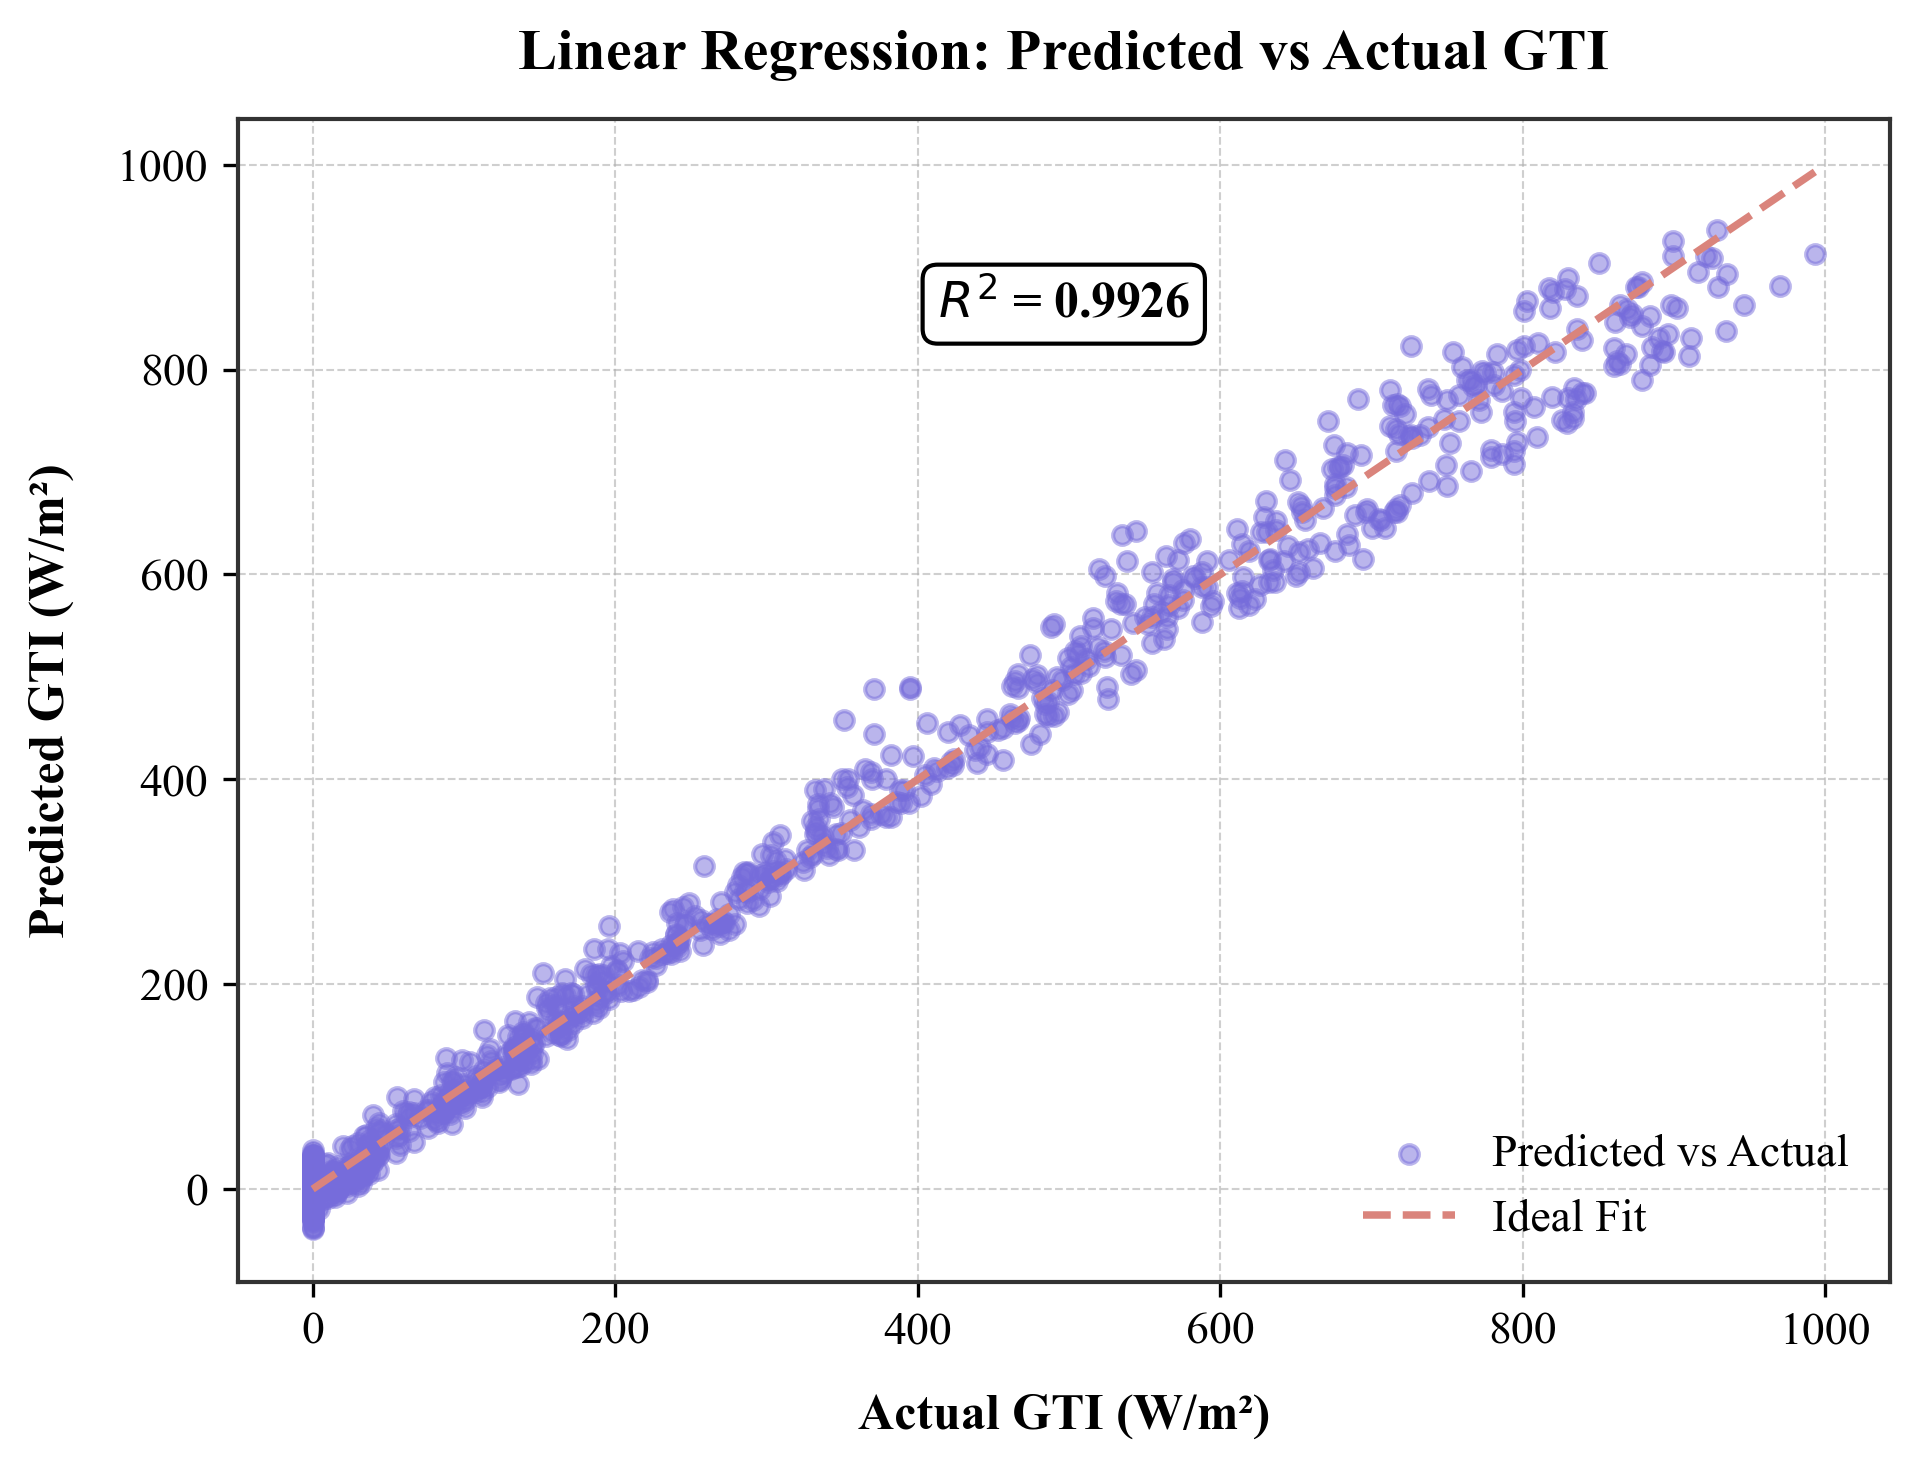

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target
features = ['ghi', 'dni', 'dhi', 'air_temp', 'cloud_opacity',
            'dewpoint_temp', 'relative_humidity', 'surface_pressure', 'zenith']
X = df_12[features]
y = df_12['gti']

# 70-15-15 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

# Metrics
metrics = {}
for split, y_true, y_pred in [('Validation', y_val, y_val_pred), ('Test', y_test, y_test_pred)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_df = pd.DataFrame(metrics).T.round(4)
print("Linear Regression Metrics:\n", metrics_df)

# Plot (IEEE-style)
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

fig, ax = plt.subplots(figsize=(6.5, 5), dpi=300)
ax.scatter(y_test, y_test_pred, color='#766CDB', alpha=0.5, label='Predicted vs Actual', s=20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#DA847C', lw=1.8, linestyle='--', label='Ideal Fit')

# R² annotation at top-center
r2_val = r2_score(y_test, y_test_pred)
mid_x = (y_test.min() + y_test.max()) / 2
top_y = y_test_pred.max() - 0.05 * (y_test_pred.max() - y_test_pred.min())
ax.text(mid_x, top_y, f'$R^2$ = {r2_val:.4f}', fontsize=12, fontweight='bold',
        ha='center', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Labels and grid
ax.set_title('Linear Regression: Predicted vs Actual GTI', pad=12)
ax.set_xlabel('Actual GTI (W/m²)', labelpad=10)
ax.set_ylabel('Predicted GTI (W/m²)', labelpad=10)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('Ph.DC-C-3.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-3.pdf', bbox_inches='tight')
plt.show()

Random Forest Metrics:
                RMSE     MAE     R2       MSE
Validation  12.4984  4.8735  0.998  156.2101
Test        11.9950  4.7259  0.998  143.8808


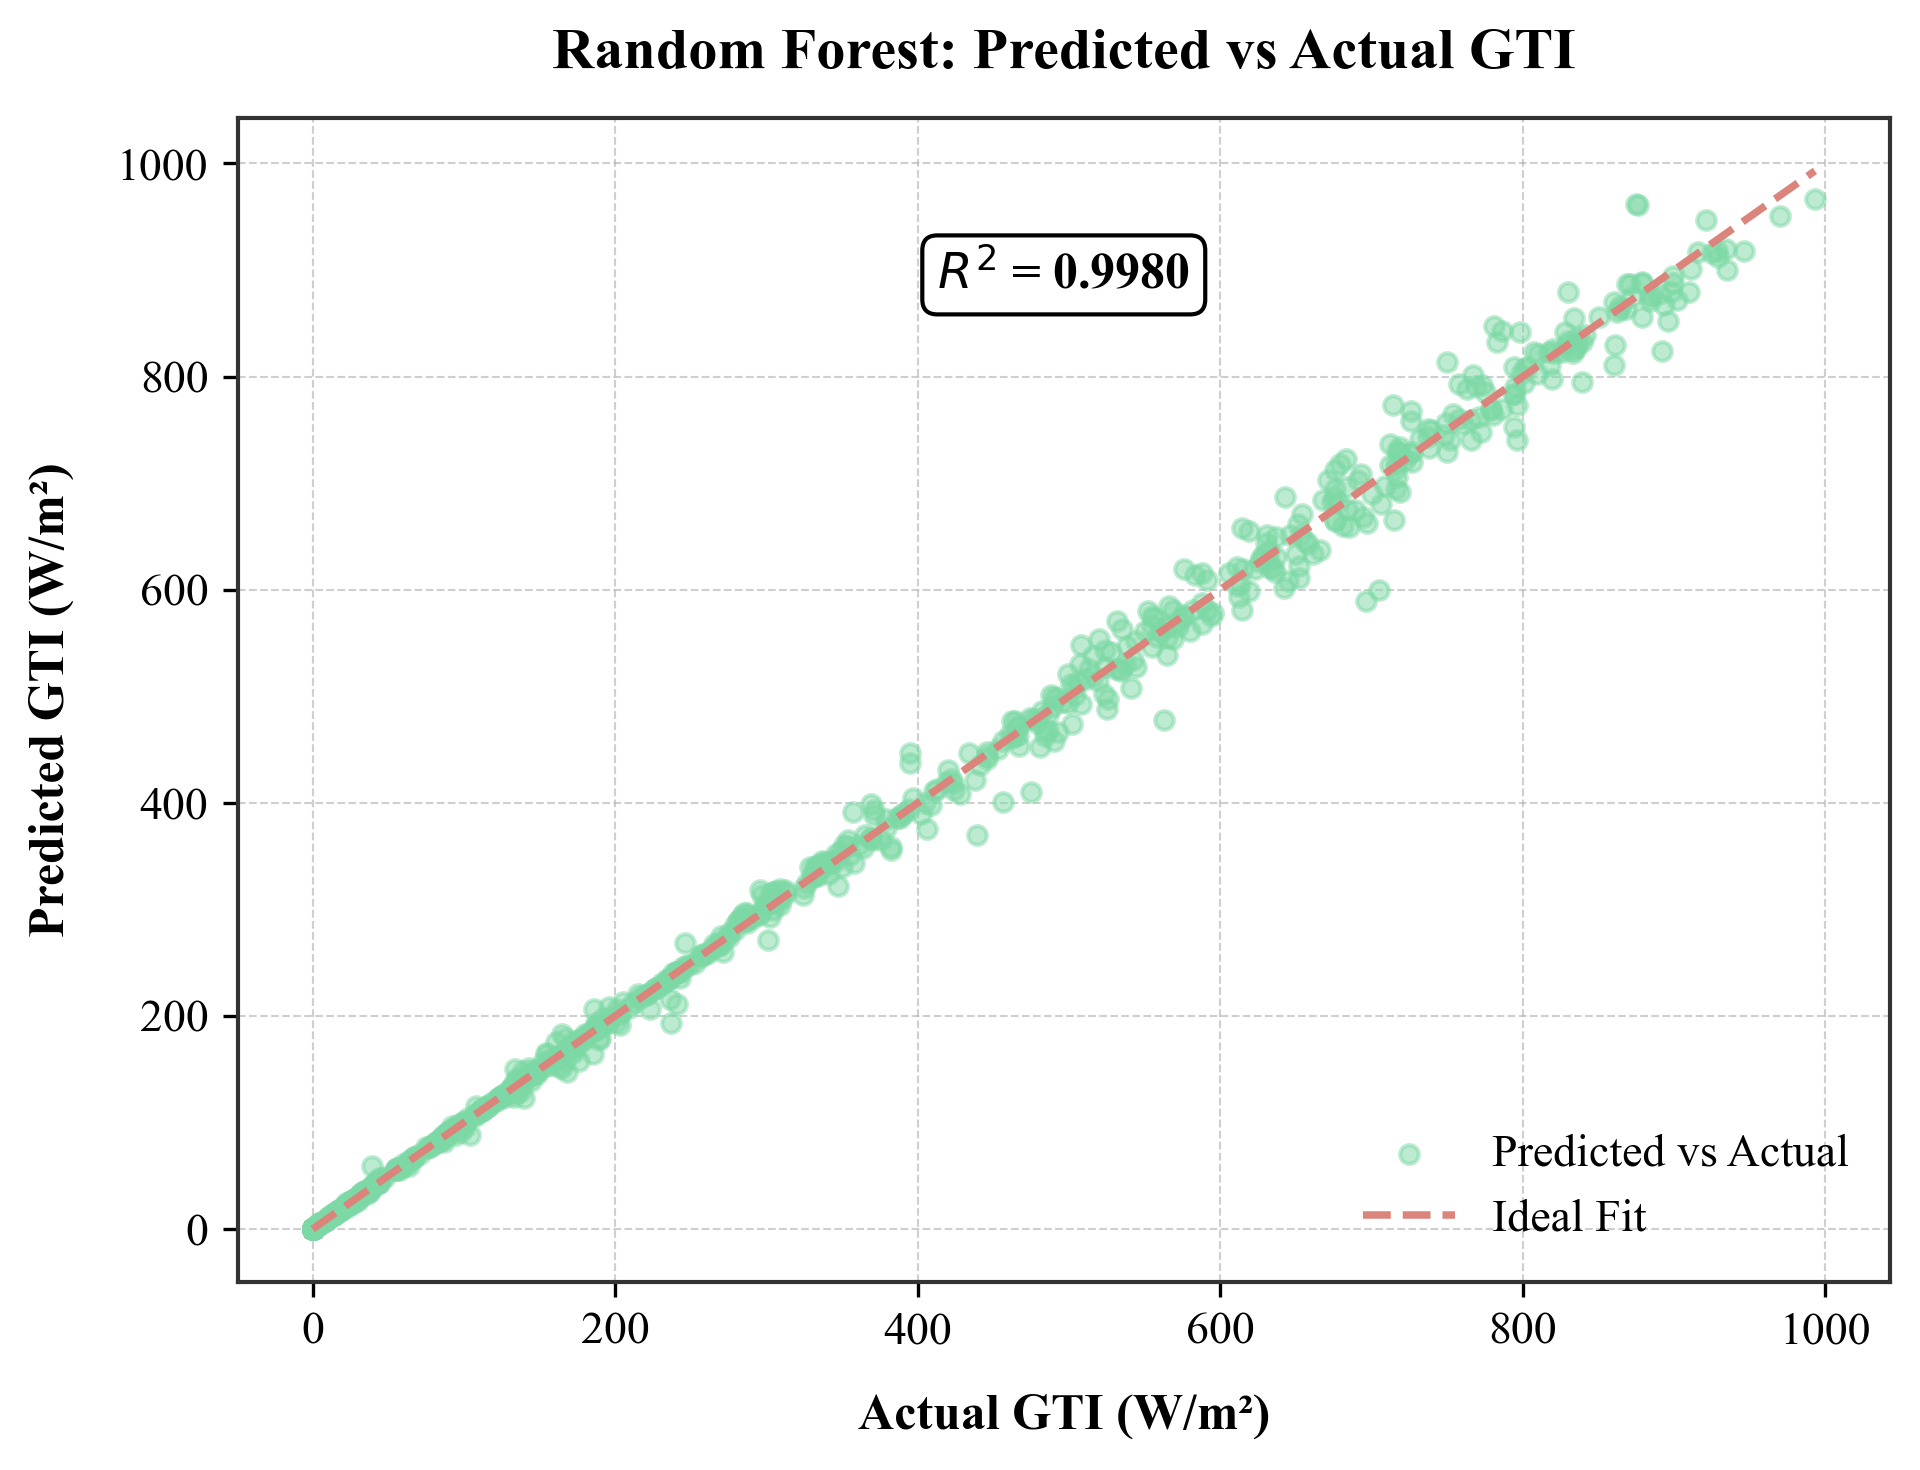

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict
y_val_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test)

# Metrics
metrics_rf = {}
for split, y_true, y_pred in [('Validation', y_val, y_val_pred_rf), ('Test', y_test, y_test_pred_rf)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics_rf[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_rf_df = pd.DataFrame(metrics_rf).T.round(4)
print("Random Forest Metrics:\n", metrics_rf_df)

# Plot (IEEE style)
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

fig, ax = plt.subplots(figsize=(6.5, 5), dpi=300)
ax.scatter(y_test, y_test_pred_rf, color='#7CD9A5', alpha=0.5, label='Predicted vs Actual', s=20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        color='#DA847C', lw=1.8, linestyle='--', label='Ideal Fit')

# Annotate R²
r2_val_rf = r2_score(y_test, y_test_pred_rf)
mid_x = (y_test.min() + y_test.max()) / 2
top_y = y_test_pred_rf.max() - 0.05 * (y_test_pred_rf.max() - y_test_pred_rf.min())
ax.text(mid_x, top_y, f'$R^2$ = {r2_val_rf:.4f}',
        fontsize=12, fontweight='bold', ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Labels and title
ax.set_title('Random Forest: Predicted vs Actual GTI', pad=12)
ax.set_xlabel('Actual GTI (W/m²)', labelpad=10)
ax.set_ylabel('Predicted GTI (W/m²)', labelpad=10)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('Ph.DC-C-4.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-4.pdf', bbox_inches='tight')
plt.show()

Decision Tree Metrics:
                RMSE     MAE      R2      MSE
Validation  20.9682  7.6463  0.9942  439.666
Test        17.7255  6.5450  0.9957  314.192


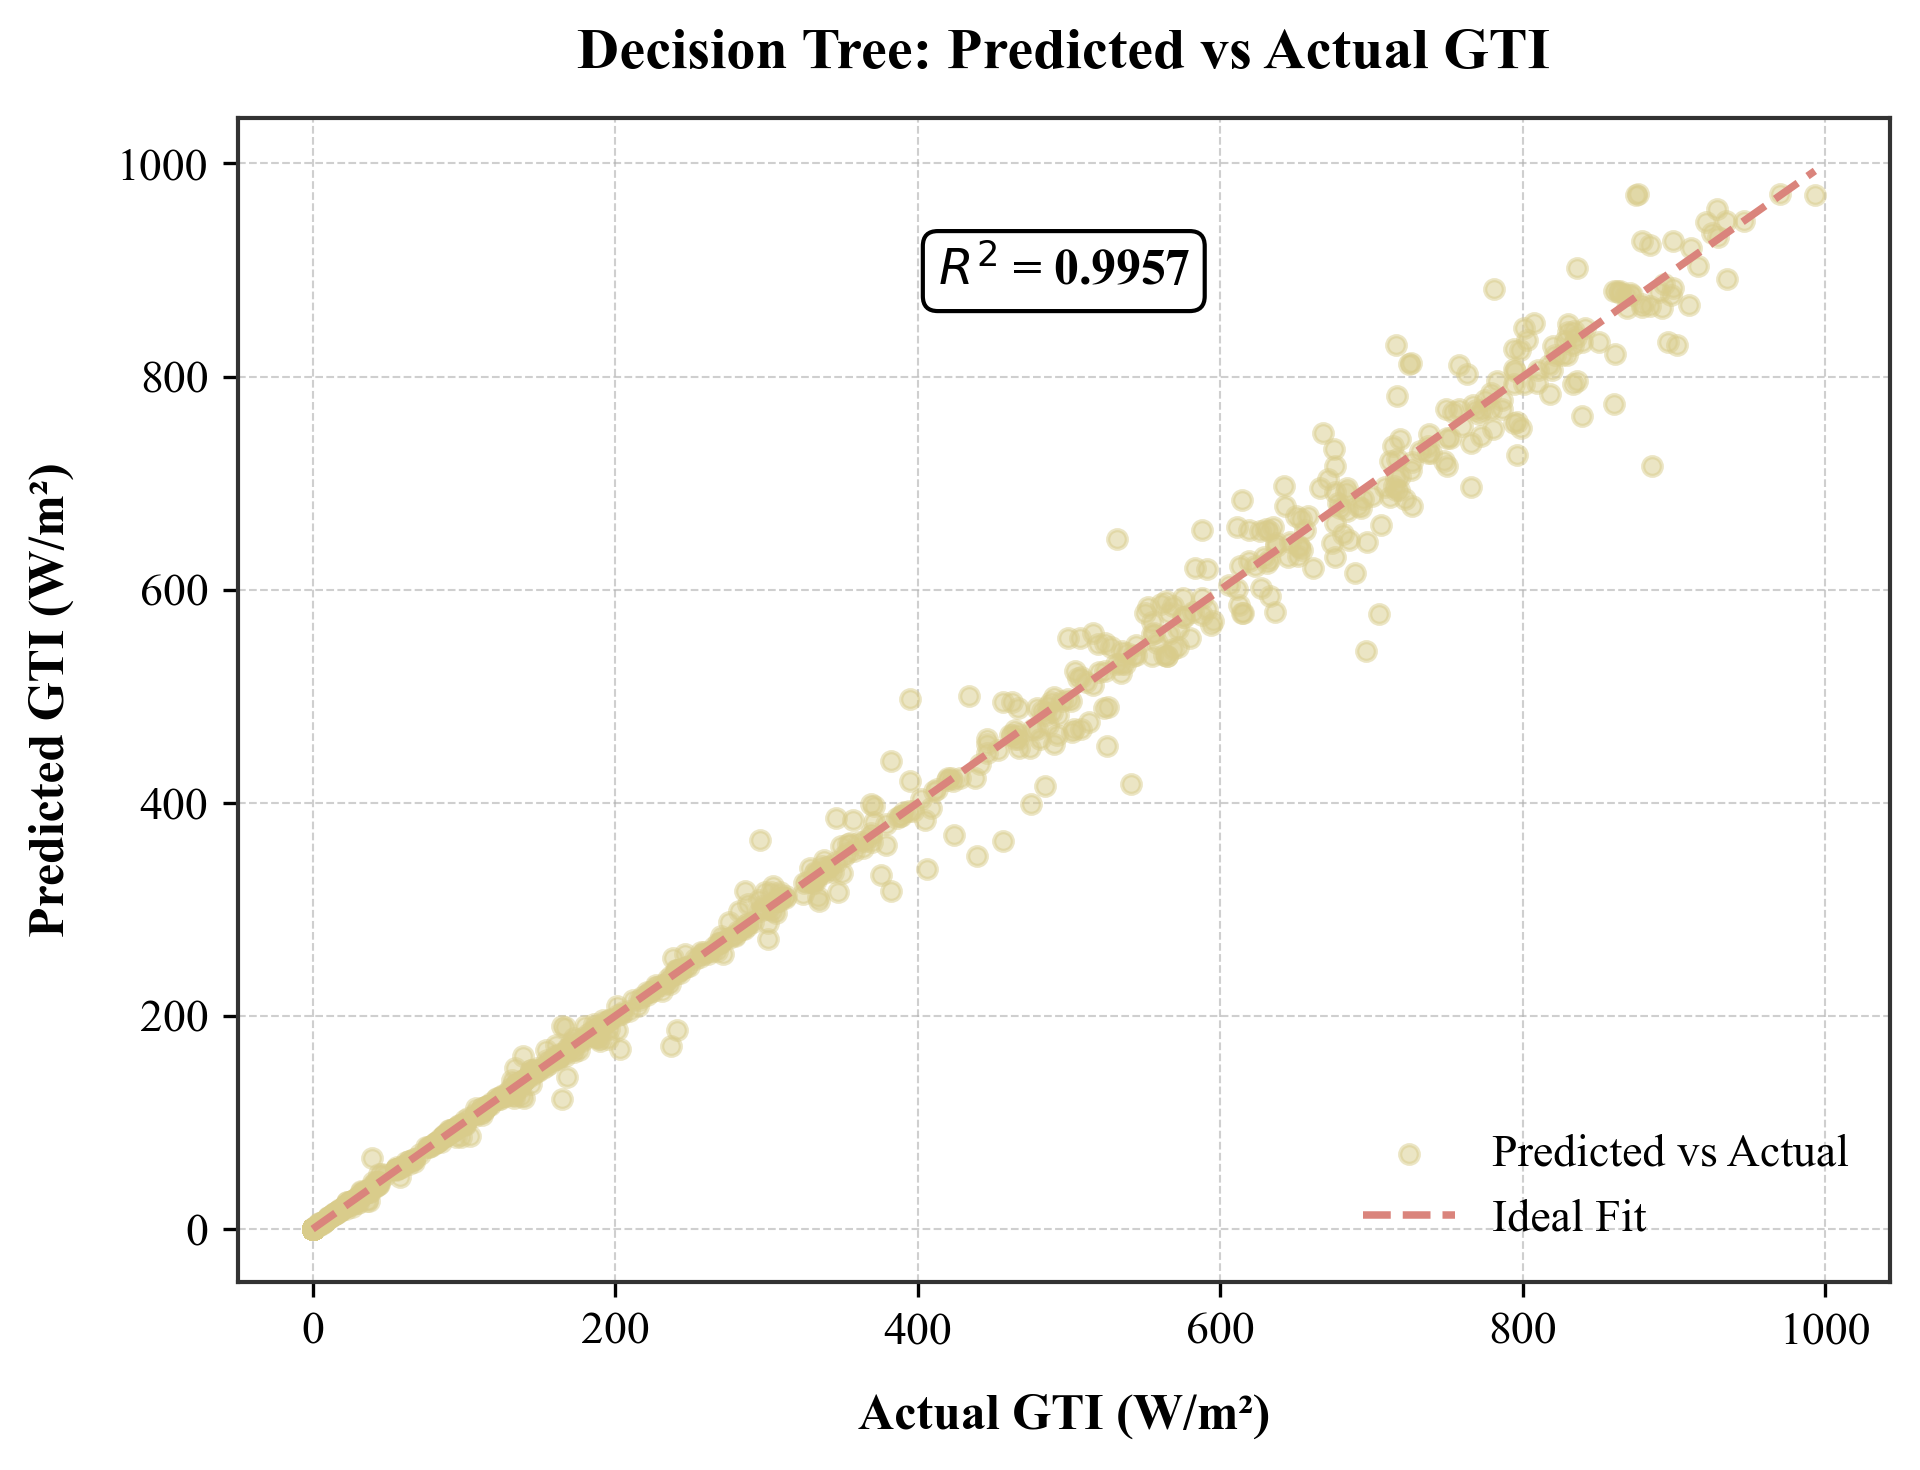

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Train the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_val_pred_dt = dt.predict(X_val)
y_test_pred_dt = dt.predict(X_test)

# Calculate performance metrics
metrics_dt = {}
for split, y_true, y_pred in [('Validation', y_val, y_val_pred_dt), ('Test', y_test, y_test_pred_dt)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics_dt[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_dt_df = pd.DataFrame(metrics_dt).T.round(4)
print("Decision Tree Metrics:\n", metrics_dt_df)

# Plot - IEEE style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

fig, ax = plt.subplots(figsize=(6.5, 5), dpi=300)
ax.scatter(y_test, y_test_pred_dt, color='#D9CC8B', alpha=0.5, label='Predicted vs Actual', s=20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        color='#DA847C', lw=1.8, linestyle='--', label='Ideal Fit')

# Annotate R²
r2_val_dt = r2_score(y_test, y_test_pred_dt)
mid_x = (y_test.min() + y_test.max()) / 2
top_y = y_test_pred_dt.max() - 0.05 * (y_test_pred_dt.max() - y_test_pred_dt.min())
ax.text(mid_x, top_y, f'$R^2$ = {r2_val_dt:.4f}',
        fontsize=12, fontweight='bold', ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Labels and styling
ax.set_title('Decision Tree: Predicted vs Actual GTI', pad=12)
ax.set_xlabel('Actual GTI (W/m²)', labelpad=10)
ax.set_ylabel('Predicted GTI (W/m²)', labelpad=10)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('Ph.DC-C-5.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-5.pdf', bbox_inches='tight')
plt.show()

                 RMSE       MAE        R2         MSE
Validation  13.384869  4.533052  0.997570  179.154712
Test         9.857137  4.133615  0.998594   97.163150


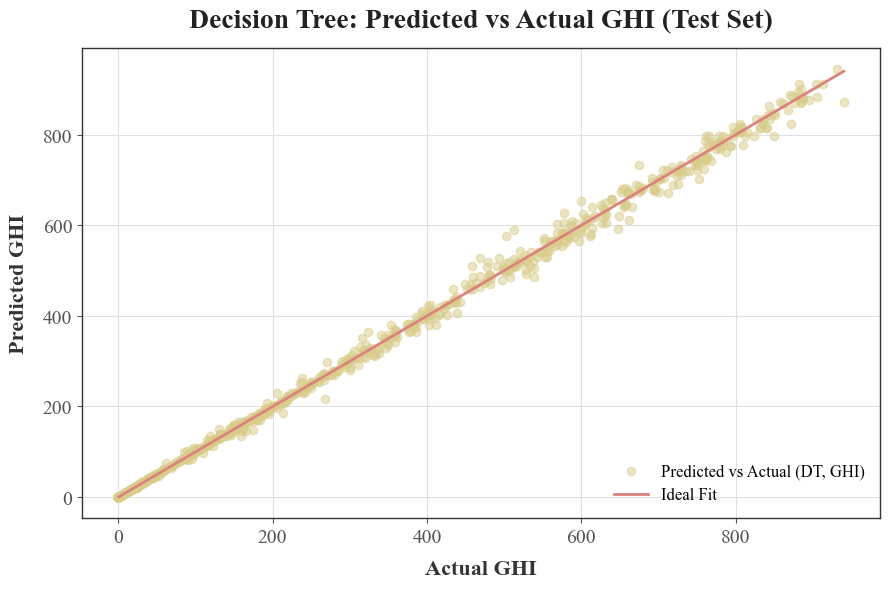

In [35]:
# Prepare data for Decision Tree regression with GHI as the target
# Use the same features as before, but exclude 'ghi' from features to avoid leakage
features_ghi = ['dni', 'dhi', 'air_temp', 'cloud_opacity', 'dewpoint_temp', 'relative_humidity', 'surface_pressure', 'zenith']
X_ghi = df_12[features_ghi]
y_ghi = df_12['ghi']

# 70-15-15 split for GHI prediction
X_train_ghi, X_temp_ghi, y_train_ghi, y_temp_ghi = train_test_split(X_ghi, y_ghi, test_size=0.30, random_state=42)
X_val_ghi, X_test_ghi, y_val_ghi, y_test_ghi = train_test_split(X_temp_ghi, y_temp_ghi, test_size=0.50, random_state=42)

# Train Decision Tree for GHI
dt_ghi = DecisionTreeRegressor(random_state=42)
dt_ghi.fit(X_train_ghi, y_train_ghi)

# Predict on validation and test sets
y_val_pred_dt_ghi = dt_ghi.predict(X_val_ghi)
y_test_pred_dt_ghi = dt_ghi.predict(X_test_ghi)

# Calculate metrics for Decision Tree (GHI)
metrics_dt_ghi = {}
for split, y_true, y_pred in [('Validation', y_val_ghi, y_val_pred_dt_ghi), ('Test', y_test_ghi, y_test_pred_dt_ghi)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics_dt_ghi[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_dt_ghi_df = pd.DataFrame(metrics_dt_ghi).T
print(metrics_dt_ghi_df)

# Visualize predicted vs actual for test set (Decision Tree, GHI)
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.scatter(y_test_ghi, y_test_pred_dt_ghi, color='#D9CC8B', alpha=0.5, label='Predicted vs Actual (DT, GHI)')
ax.plot([y_test_ghi.min(), y_test_ghi.max()], [y_test_ghi.min(), y_test_ghi.max()], color='#DA847C', lw=2, label='Ideal Fit')
ax.set_title('Decision Tree: Predicted vs Actual GHI (Test Set)', fontsize=20, color='#222222', pad=15)
ax.set_xlabel('Actual GHI', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Predicted GHI', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(axis='both', labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(color='#E0E0E0')
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
ax.legend(fontsize=12, loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

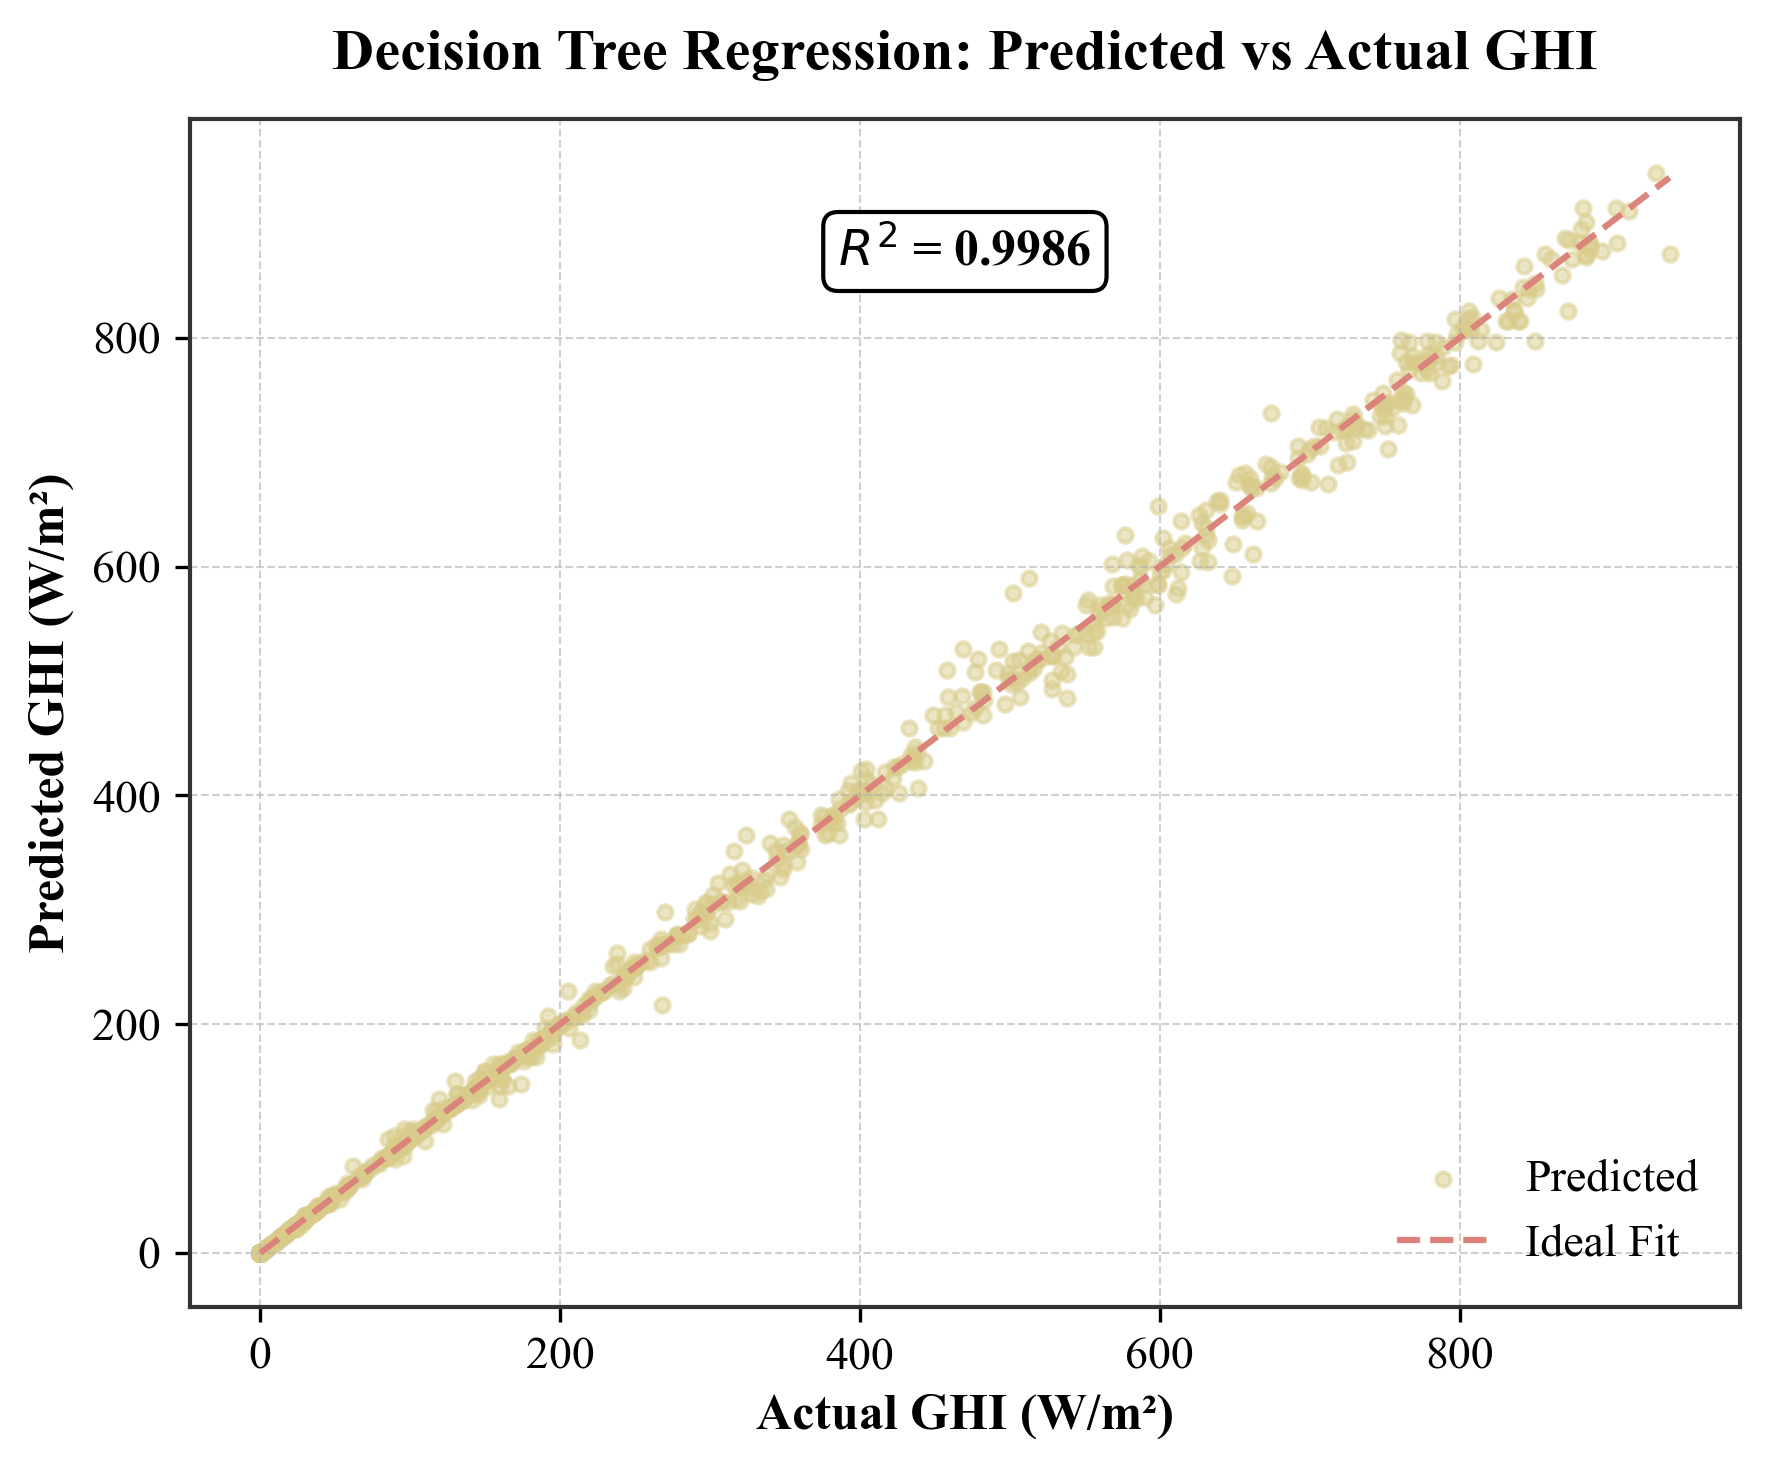

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set IEEE-compatible font and styling
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# Scatter plot with R² annotation
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(y_test_ghi, y_test_pred_dt_ghi, color='#D9CC8B', alpha=0.5, s=12, label='Predicted')
ax.plot([y_test_ghi.min(), y_test_ghi.max()],
        [y_test_ghi.min(), y_test_ghi.max()],
        color='#DA847C', lw=1.5, linestyle='--', label='Ideal Fit')

# Labels and Title
ax.set_title('Decision Tree Regression: Predicted vs Actual GHI', pad=12)
ax.set_xlabel('Actual GHI (W/m²)')
ax.set_ylabel('Predicted GHI (W/m²)')

# R² annotation at top center
r2 = r2_score(y_test_ghi, y_test_pred_dt_ghi)
mid_x = (y_test_ghi.min() + y_test_ghi.max()) / 2
top_y = y_test_pred_dt_ghi.max() - 0.05 * (y_test_pred_dt_ghi.max() - y_test_pred_dt_ghi.min())
ax.text(mid_x, top_y, f'$R^2$ = {r2:.4f}', fontsize=12, fontweight='bold',
        ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Grid, ticks, and legend
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
ax.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.savefig('Ph.DC-C-6.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-6.pdf', bbox_inches='tight')
plt.show()

                RMSE      MAE        R2        MSE
Validation  6.414235  2.48327  0.999442  41.142415
Test        5.690542  2.36225  0.999531  32.382265


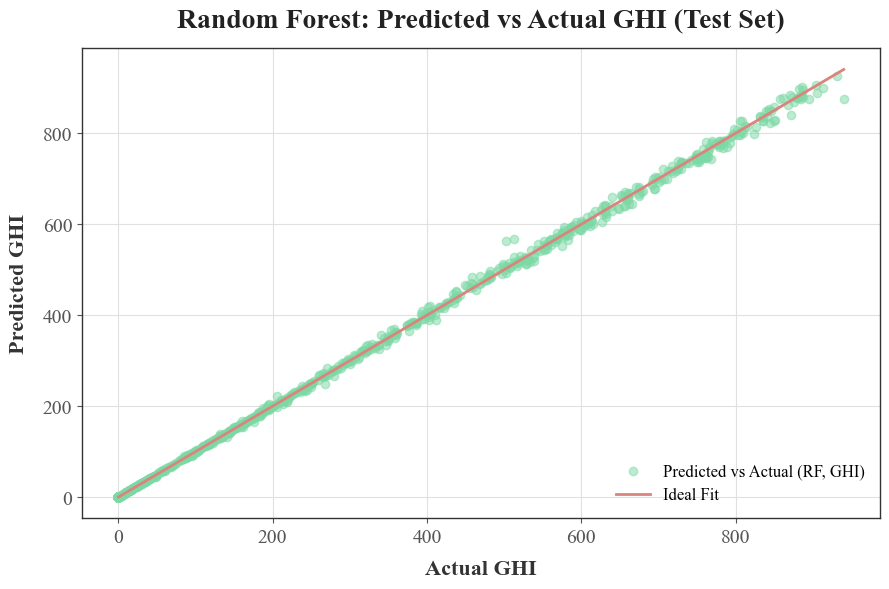

In [37]:
# Train a Random Forest regression model for GHI prediction and evaluate performance
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on the same features and split as Decision Tree for GHI
df_rf_ghi = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
df_rf_ghi.fit(X_train_ghi, y_train_ghi)

# Predict on validation and test sets
y_val_pred_rf_ghi = df_rf_ghi.predict(X_val_ghi)
y_test_pred_rf_ghi = df_rf_ghi.predict(X_test_ghi)

# Calculate metrics for Random Forest (GHI)
metrics_rf_ghi = {}
for split, y_true, y_pred in [('Validation', y_val_ghi, y_val_pred_rf_ghi), ('Test', y_test_ghi, y_test_pred_rf_ghi)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics_rf_ghi[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_rf_ghi_df = pd.DataFrame(metrics_rf_ghi).T
print(metrics_rf_ghi_df)

# Visualize predicted vs actual for test set (Random Forest, GHI)
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.scatter(y_test_ghi, y_test_pred_rf_ghi, color='#7CD9A5', alpha=0.5, label='Predicted vs Actual (RF, GHI)')
ax.plot([y_test_ghi.min(), y_test_ghi.max()], [y_test_ghi.min(), y_test_ghi.max()], color='#DA847C', lw=2, label='Ideal Fit')
ax.set_title('Random Forest: Predicted vs Actual GHI (Test Set)', fontsize=20, color='#222222', pad=15)
ax.set_xlabel('Actual GHI', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Predicted GHI', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(axis='both', labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(color='#E0E0E0')
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
ax.legend(fontsize=12, loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

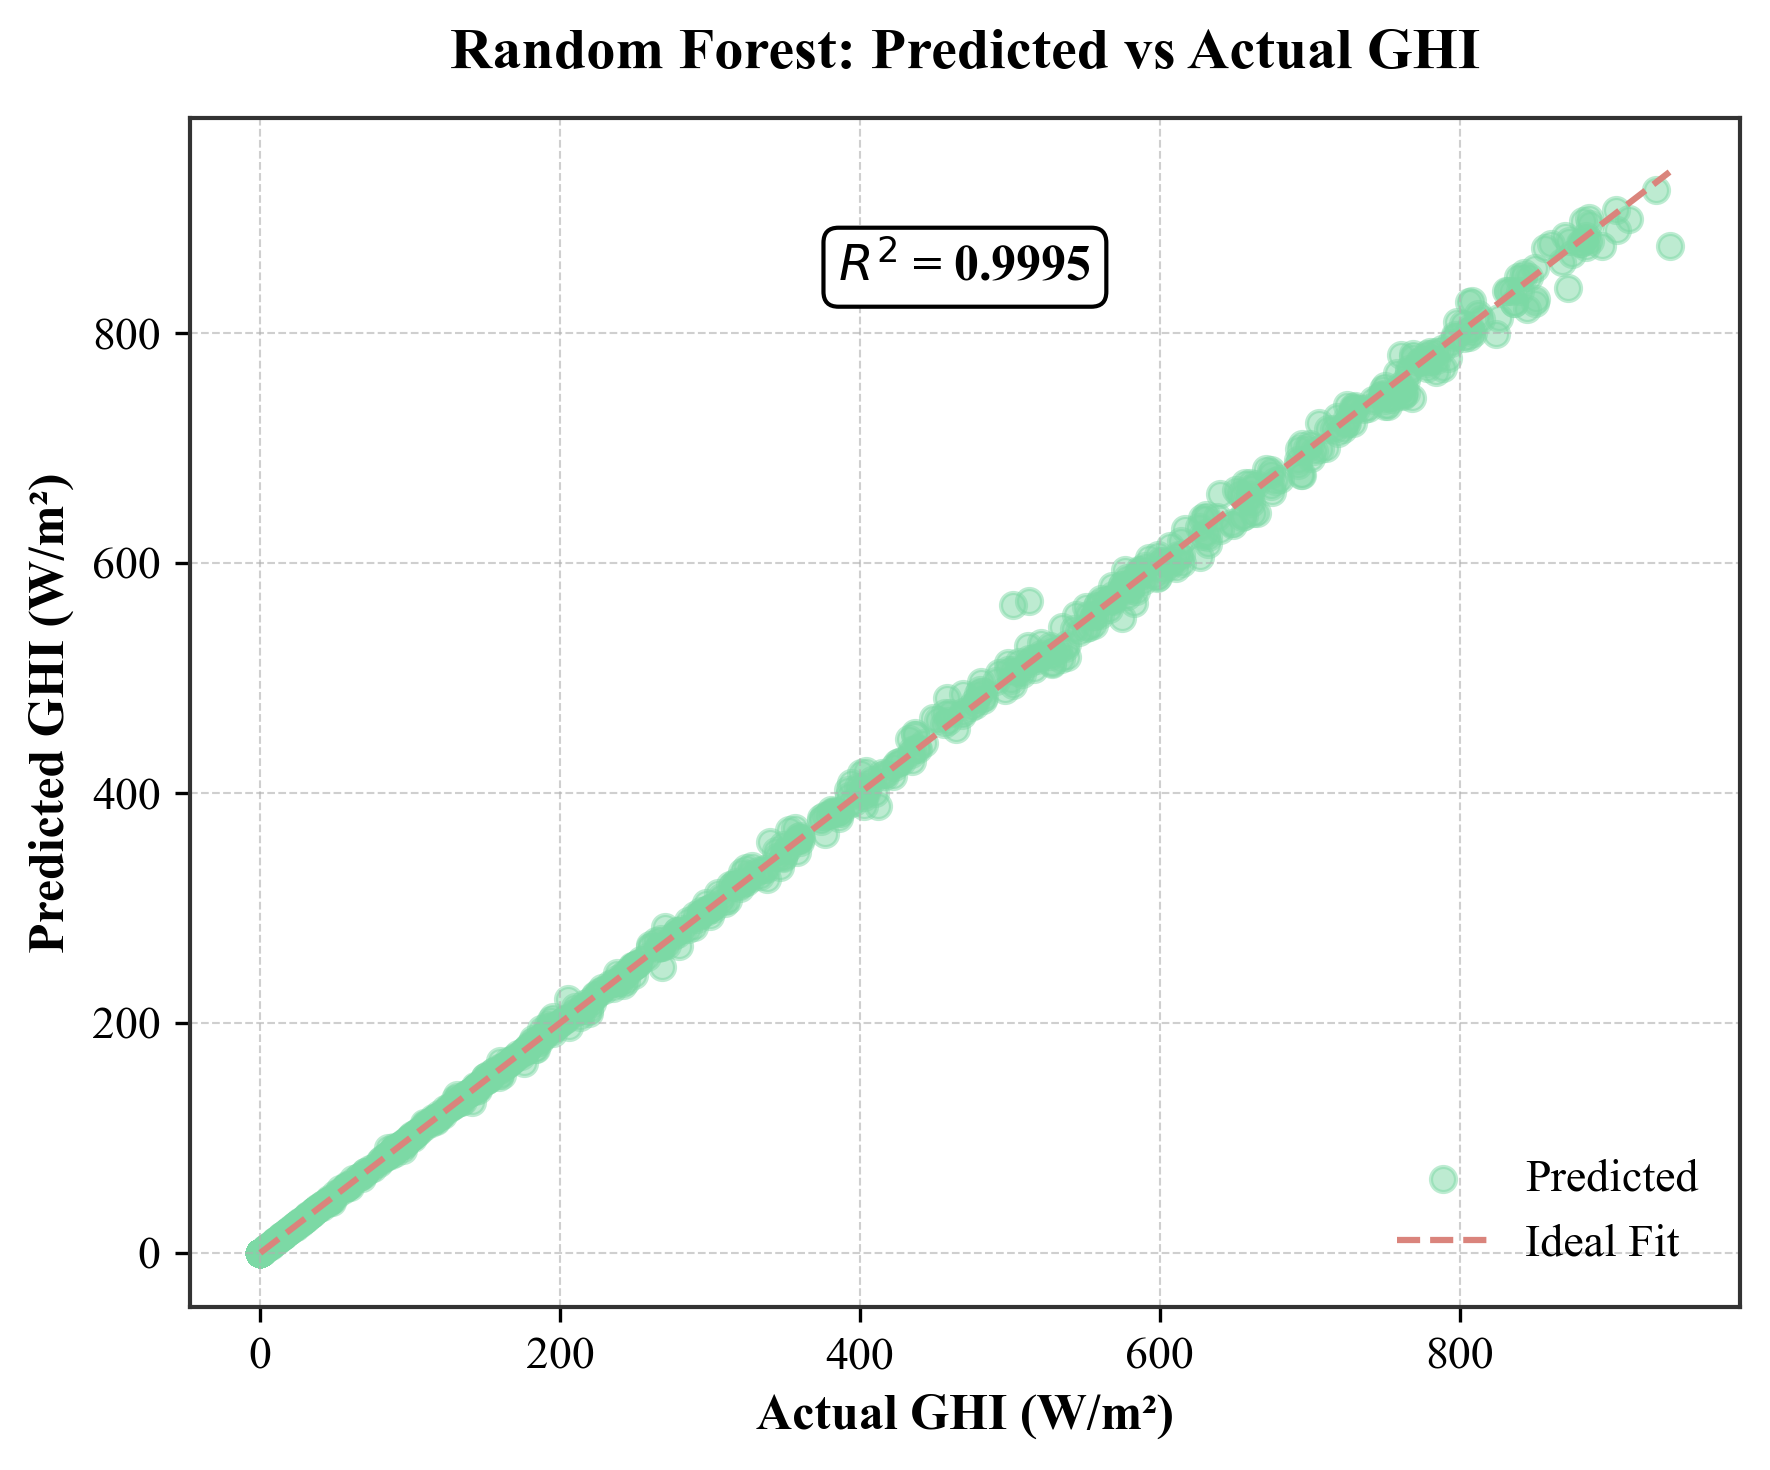

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Apply IEEE styling
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# R² for annotation
r2_rf_ghi = r2_score(y_test_ghi, y_test_pred_rf_ghi)
mid_x = (y_test_ghi.min() + y_test_ghi.max()) / 2
top_y = y_test_pred_rf_ghi.max() - 0.05 * (y_test_pred_rf_ghi.max() - y_test_pred_rf_ghi.min())

# Plot
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(y_test_ghi, y_test_pred_rf_ghi, color='#7CD9A5', alpha=0.5, label='Predicted')
ax.plot([y_test_ghi.min(), y_test_ghi.max()],
        [y_test_ghi.min(), y_test_ghi.max()],
        color='#DA847C', linestyle='--', lw=1.5, label='Ideal Fit')

# Titles and labels
ax.set_title('Random Forest: Predicted vs Actual GHI', pad=12)
ax.set_xlabel('Actual GHI (W/m²)')
ax.set_ylabel('Predicted GHI (W/m²)')

# R² annotation (top-center)
ax.text(mid_x, top_y, f'$R^2$ = {r2_rf_ghi:.4f}',
        fontsize=12, fontweight='bold',
        ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Grid and legend
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.legend(loc='lower right', frameon=False)

# Spines
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)

# Save and show
plt.tight_layout()
plt.savefig('Ph.DC-C-7.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-7.pdf', bbox_inches='tight')
plt.show()

                 RMSE        MAE        R2          MSE
Validation  40.204819  23.632381  0.978073  1616.427469
Test        37.018358  21.550270  0.980164  1370.358819


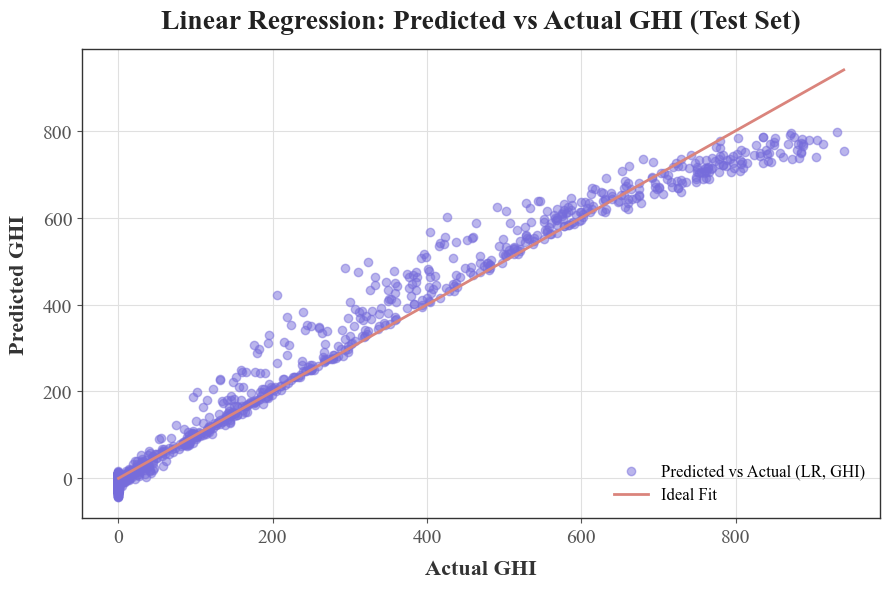

In [39]:
# Train a Linear Regression model for GHI prediction and evaluate performance
from sklearn.linear_model import LinearRegression

# Train Linear Regression on the same features and split as before for GHI
lr_ghi = LinearRegression()
lr_ghi.fit(X_train_ghi, y_train_ghi)

# Predict on validation and test sets
y_val_pred_lr_ghi = lr_ghi.predict(X_val_ghi)
y_test_pred_lr_ghi = lr_ghi.predict(X_test_ghi)

# Calculate metrics for Linear Regression (GHI)
metrics_lr_ghi = {}
for split, y_true, y_pred in [('Validation', y_val_ghi, y_val_pred_lr_ghi), ('Test', y_test_ghi, y_test_pred_lr_ghi)]:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    metrics_lr_ghi[split] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

metrics_lr_ghi_df = pd.DataFrame(metrics_lr_ghi).T
print(metrics_lr_ghi_df)

# Visualize predicted vs actual for test set (Linear Regression, GHI)
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.scatter(y_test_ghi, y_test_pred_lr_ghi, color='#766CDB', alpha=0.5, label='Predicted vs Actual (LR, GHI)')
ax.plot([y_test_ghi.min(), y_test_ghi.max()], [y_test_ghi.min(), y_test_ghi.max()], color='#DA847C', lw=2, label='Ideal Fit')
ax.set_title('Linear Regression: Predicted vs Actual GHI (Test Set)', fontsize=20, color='#222222', pad=15)
ax.set_xlabel('Actual GHI', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Predicted GHI', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(axis='both', labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(color='#E0E0E0')
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
ax.legend(fontsize=12, loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

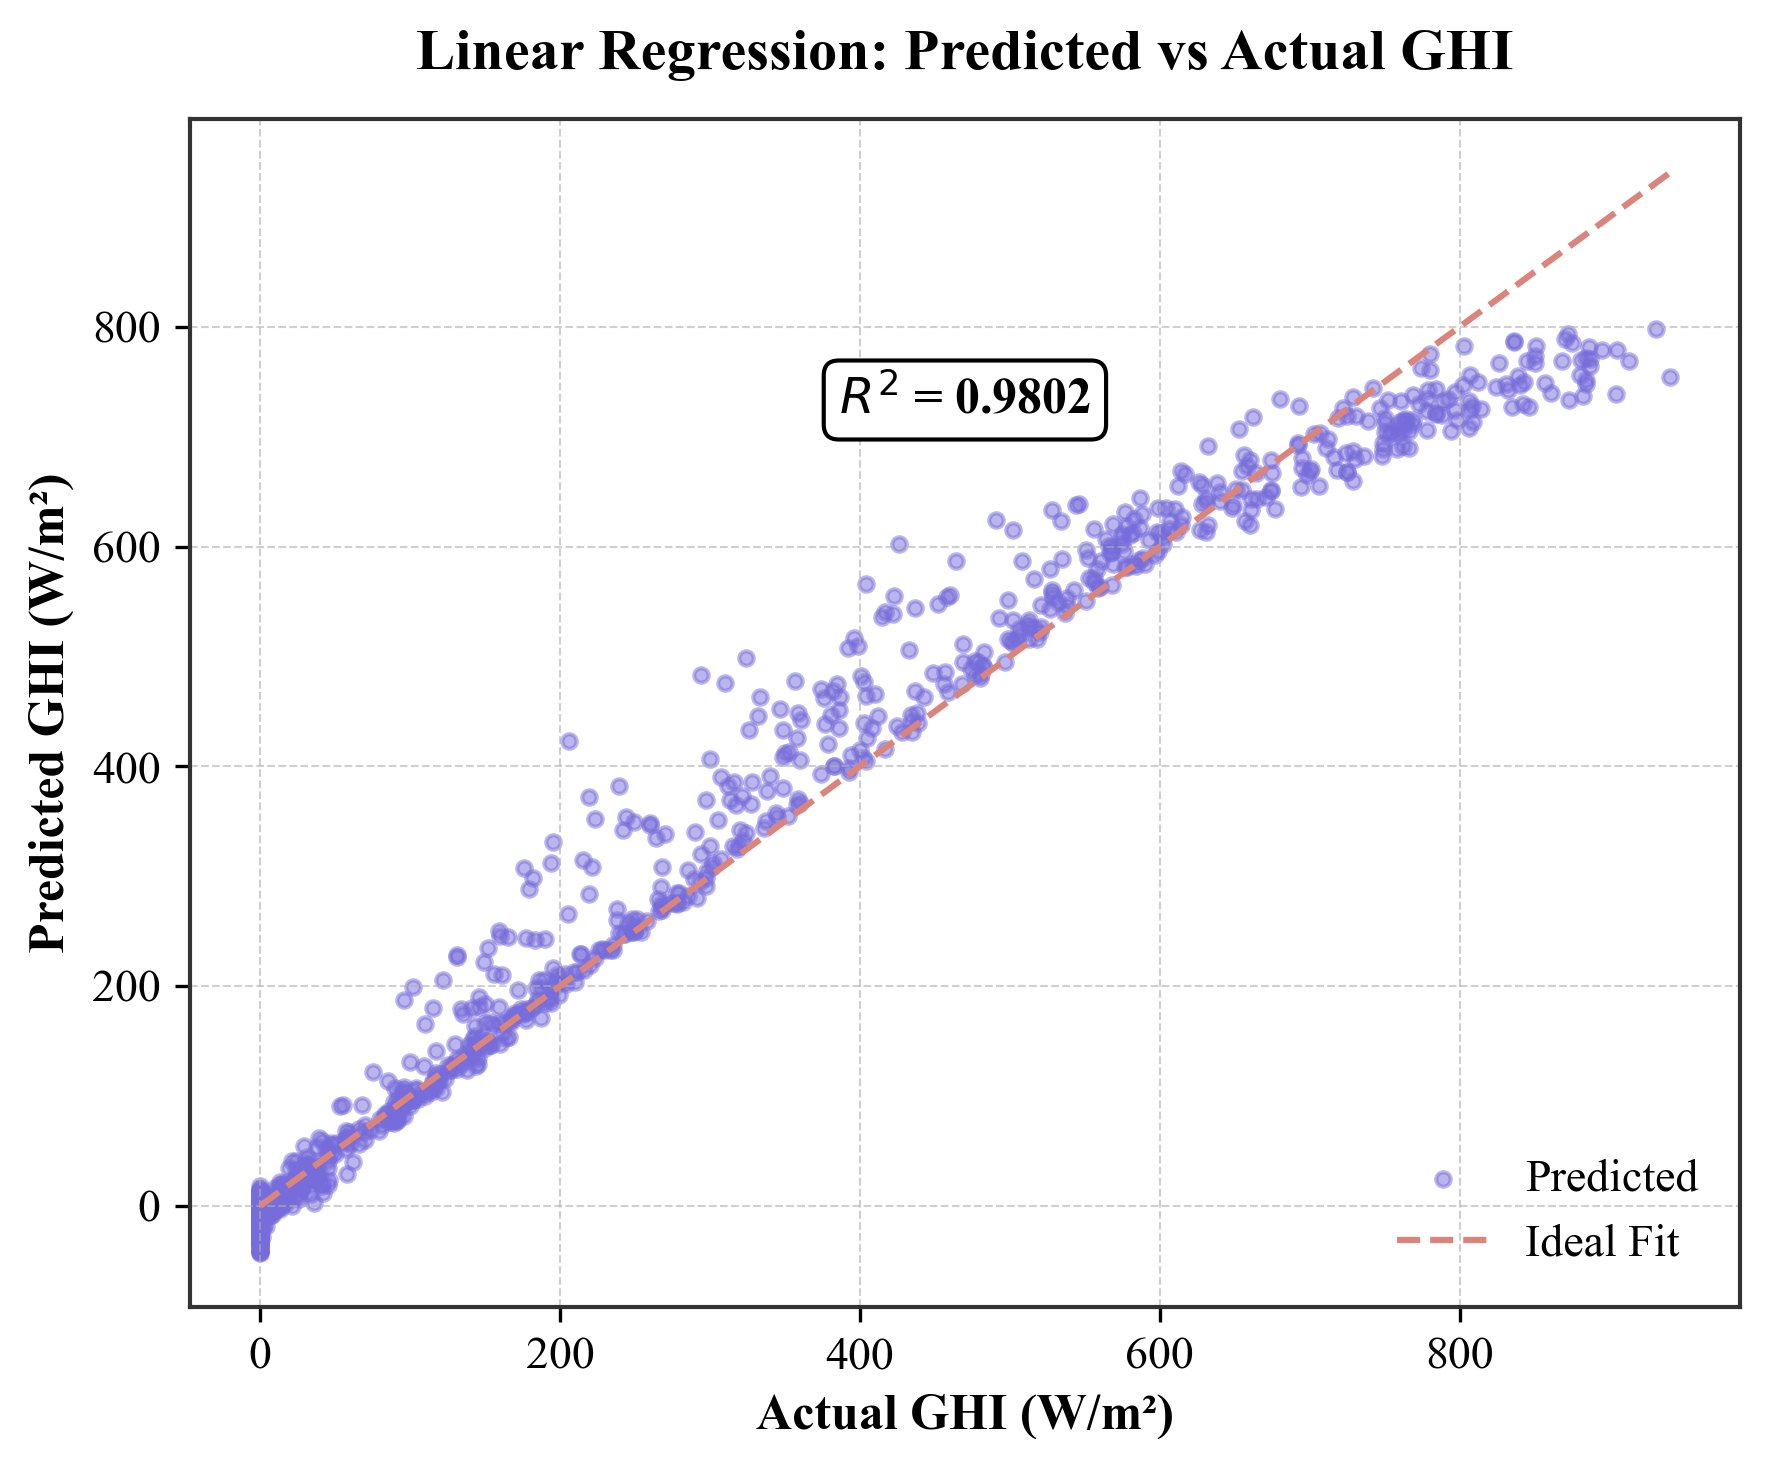

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# IEEE style settings
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# R² annotation positioning
r2_lr_ghi = r2_score(y_test_ghi, y_test_pred_lr_ghi)
mid_x = (y_test_ghi.min() + y_test_ghi.max()) / 2
top_y = y_test_pred_lr_ghi.max() - 0.05 * (y_test_pred_lr_ghi.max() - y_test_pred_lr_ghi.min())

# Plot
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(y_test_ghi, y_test_pred_lr_ghi, color='#766CDB', alpha=0.5, s=12, label='Predicted')
ax.plot([y_test_ghi.min(), y_test_ghi.max()],
        [y_test_ghi.min(), y_test_ghi.max()],
        color='#DA847C', linestyle='--', lw=1.5, label='Ideal Fit')

# Labels and title
ax.set_title('Linear Regression: Predicted vs Actual GHI', pad=12)
ax.set_xlabel('Actual GHI (W/m²)')
ax.set_ylabel('Predicted GHI (W/m²)')

# R² annotation
ax.text(mid_x, top_y, f'$R^2$ = {r2_lr_ghi:.4f}', fontsize=12, fontweight='bold',
        ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Grid, spines, and legend
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
ax.legend(loc='lower right', frameon=False)

# Save and show
plt.tight_layout()
plt.savefig('Ph.DC-C-8.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-8.pdf', bbox_inches='tight')
plt.show()

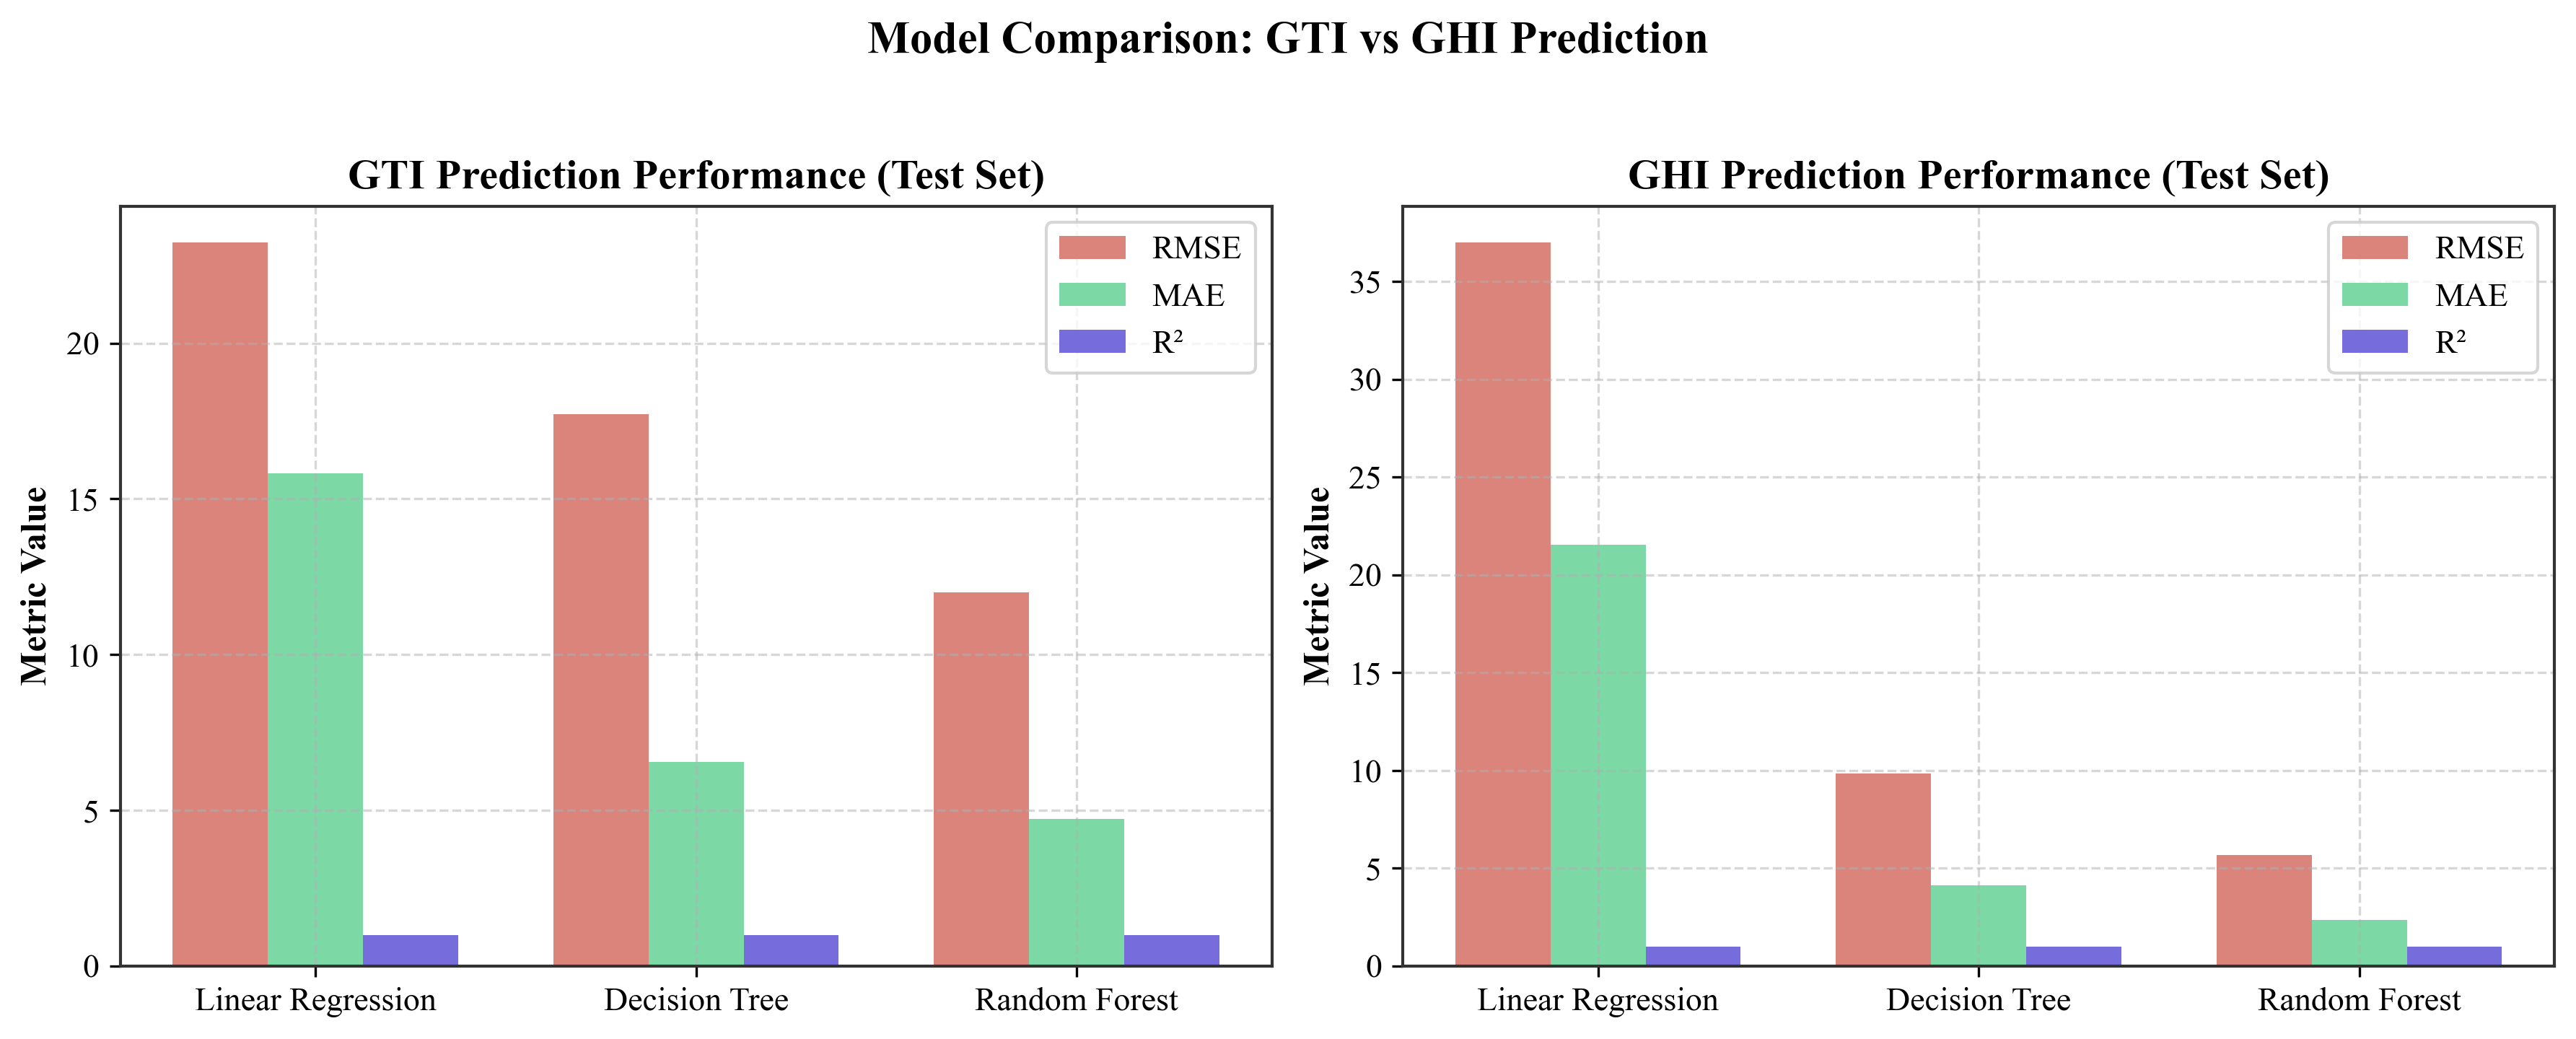

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Apply IEEE plot style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'savefig.dpi': 300
})

# Data: Test Set Metrics
metrics_gti = {
    'Linear Regression': {'RMSE': 23.24, 'MAE': 15.81, 'R2': 0.9926},
    'Decision Tree':     {'RMSE': 17.73, 'MAE': 6.55,  'R2': 0.9957},
    'Random Forest':     {'RMSE': 12.00, 'MAE': 4.73,  'R2': 0.9980},
}

metrics_ghi = {
    'Linear Regression': {'RMSE': 37.02, 'MAE': 21.55, 'R2': 0.9802},
    'Decision Tree':     {'RMSE': 9.86,  'MAE': 4.13,  'R2': 0.9986},
    'Random Forest':     {'RMSE': 5.69,  'MAE': 2.36,  'R2': 0.9995},
}

models = list(metrics_gti.keys())
x = np.arange(len(models))
width = 0.25

# Extract values
rmse_gti = [metrics_gti[m]['RMSE'] for m in models]
mae_gti = [metrics_gti[m]['MAE'] for m in models]
r2_gti  = [metrics_gti[m]['R2'] for m in models]

rmse_ghi = [metrics_ghi[m]['RMSE'] for m in models]
mae_ghi = [metrics_ghi[m]['MAE'] for m in models]
r2_ghi  = [metrics_ghi[m]['R2'] for m in models]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# --- GTI ---
axes[0].bar(x - width, rmse_gti, width, label='RMSE', color='#DA847C')
axes[0].bar(x,        mae_gti,  width, label='MAE',  color='#7CD9A5')
axes[0].bar(x + width, r2_gti,  width, label='R²',   color='#766CDB')

axes[0].set_title('GTI Prediction Performance (Test Set)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylabel('Metric Value')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- GHI ---
axes[1].bar(x - width, rmse_ghi, width, label='RMSE', color='#DA847C')
axes[1].bar(x,        mae_ghi,  width, label='MAE',  color='#7CD9A5')
axes[1].bar(x + width, r2_ghi,  width, label='R²',   color='#766CDB')

axes[1].set_title('GHI Prediction Performance (Test Set)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_ylabel('Metric Value')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

for ax in axes:
    for spine in ax.spines.values():
        spine.set_color('#333333')
        spine.set_linewidth(1)

plt.suptitle('Model Comparison: GTI vs GHI Prediction', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Ph.DC-C-9.png', dpi=300, bbox_inches='tight')
plt.savefig('Ph.DC-C-9.pdf', bbox_inches='tight')
plt.show()